In [9]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from tqdm import tqdm

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

%matplotlib inline
import IPython.display as display
import asyncio
import nest_asyncio
nest_asyncio.apply()

In [3]:
class configuration:
    def __init__(self):
        self.cls = -1
        
    @property
    def cls(self):
        return self.cls
    @cls.setter
    def cls(self, newcls):
        self.cls = newcls
        if cls in [0,1]:
            img_path = os.path.join(self.output_folder, f'{self.img_name}-{self.i}_{self.cls}.png')
            cv2.imwrite(self.img_path,self.arr)
        if cls == 2:
            small_arrs = np.array_split(img, img.shape[1]//5, axis=1)
            
            for j, small_arr in enumerate(small_arrs):
                cls = -1
                cv2.imshow("small_img",small_arr)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                while int(cls) not in [0,1,2]:
                    display.display(buttons_classification, clear=True)
                    time.sleep(2)
                img_path = os.path.join(output_folder,f'{img_name}-{i}-{j}_{cls}.png')
                cv2.imwrite(output_folder,small_arr)
    

In [4]:
cfg = configuration()

hi


In [5]:
cfg.cls = -1

hi


In [25]:
class_dict = {'lug':1, 'wood':0, 'ambiguous':2}
skip_enum = {'proceed':1, 'skip':2}
cls = -1
cnt = -1
output = widgets.Output()

@output.capture(clear_output=False,wait=True) # based on https://github.com/jupyter-widgets/ipywidgets/issues/1846 and https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html
def classification(b):
    global cls 
    cls = class_dict[b.description]

def skip_fn(b):
    cnt = skip_enum[b.description]

In [3]:
def wait_for_change(button1, button2, button3): #<------ Rename to widget1, and add widget2
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        button1.on_click(getvalue, remove=True) #<------ Rename to widget1
        button2.on_click(getvalue, remove=True) #<------ New widget2
        button3.on_click(getvalue, remove=True) #<------ New widget2

        # we need to free up the binding to getvalue to avoid an IvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    button1.on_click(getvalue) #<------ Rename to widget1
    button2.on_click(getvalue) #<------ New widget2
    button3.on_click(getvalue)
    return future

In [24]:
button_lug = widgets.Button(description='lug', cls=1)
button_wood = widgets.Button(description = "wood",cls=2)
button_ambiguious = widgets.Button(description = "ambiguous", cls=3)

buttons_classification = widgets.HBox([button_lug, button_wood, button_ambiguious])

button_continue = widgets.Button(description ="proceed") 
button_skip = widgets.Button(description="skip")

buttons_first = widgets.HBox([button_continue, button_skip])

button_lug.on_click(classification)
button_ambiguious.on_click(classification)
button_wood.on_click(classification)

button_skip.on_click(skip_fn)
button_continue.on_click(skip_fn)

display.display(buttons_classification)
print(cls)


-1


In [12]:
img_path = "../data/img_0.png"
img = cv2.imread(img_path)


In [7]:

arrs = np.array_split(img, img.shape[1]//5, axis=1)


In [8]:
arrs[-1].shape

(536, 5, 3)

In [9]:
for arr in arrs:
    cv2.imshow("aaa",arr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

KeyboardInterrupt: 

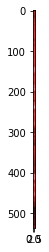

In [10]:

plt.imshow(arrs[-1])


In [6]:
import os
import time
def annotate_img(img, img_name, output_folder):
    arrs = np.array_split(img, img.shape[1]//50, axis=1)
    global cls
    cls = -1
    print(cls)
    for i, arr in enumerate(arrs):
        cv2.imshow("big_chunkimg",arr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x = str(input("is lug: 1 not:0 ambigous hit enter"))
        
            
        if int(x) in [0,1]:
            img_path = os.path.join(output_folder, f'{img_name}-{i}_{x}.png')
            cv2.imwrite(img_path,arr)
            
        else:
            small_arrs = np.array_split(img, img.shape[1]//5, axis=1)
            for j, small_arr in enumerate(small_arrs):
                cv2.imshow("small_img",small_arr)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                x = str(input("is lug: 1 not:0 ambigous hit enter"))

                while int(cls) not in [0,1,2]:
                    display.display(buttons_classification, clear=True)
                    time.sleep(2)
                img_path = os.path.join(output_folder,f'{img_name}-{i}-{j}_{x}.png')
                cv2.imwrite(output_folder,small_arr)

In [13]:
annotate_img(img, img_path.split('/')[-1].split('.')[0], "../data/test")

-1
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter1
is lug: 1 not:0 ambigous hit enter1
is lug: 1 not:0 ambigous hit enter1


In [20]:
def choose_images(img_paths, outpout_folder):
    
    for i in tqdm(range(len(img_paths))):
        cnt = -1
        path = img_paths[i]
        arr = cv2.imread(path)
        cv2.imshow("img",arr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x = str(input("enter a char to proceed to annotating the img"))
        
        if x:
            img_name = img_path.split('/')[-1].split('.')[0]
            annotate_img(img=arr, img_name=img_name, output_folder=output_folder)
        display.clear_output(wait=True)

In [ ]:
folder_path = "../data/raw/camA_Monochrome/"
output_folder = "../data/annotated/cam_A_mono/"

img_paths = glob(f'{folder_path}/*.png')
choose_images(img_paths, output_folder)

  0%|                                                  | 0/500 [00:00<?, ?it/s]

enter a char to proceed to annotating the img4
-1
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0


In [48]:
def divide_image(img, new_width, img_name, folder):
    small_arrs = np.array_split(img, img.shape[1]//new_width, axis=1)

    
    for i, ar in enumerate(small_arrs[2:]):
        im_p = os.path.join(folder, img_name+f'_{i}.png')
        cv2.imwrite(im_p, ar)

In [51]:
from pathlib import Path

folder_path = "
output_folder = Path("../data/annotated/1")

img_paths = glob(f'{folder_path}/*.png')

for i in tqdm(range(len(img_paths))):
    p = img_paths[i]
    name =  p.split('\\')[-1].split('.')[0]
    img = cv2.imread(p)
    divide_image(img, 5, name, output_folder)
    

  1%|▎                                         | 3/500 [00:00<00:16, 29.70it/s]

..\data\annotated\1\img_0_0.png
..\data\annotated\1\img_0_1.png
..\data\annotated\1\img_0_2.png
..\data\annotated\1\img_0_3.png
..\data\annotated\1\img_0_4.png
..\data\annotated\1\img_0_5.png
..\data\annotated\1\img_0_6.png
..\data\annotated\1\img_0_7.png
..\data\annotated\1\img_0_8.png
..\data\annotated\1\img_0_9.png
..\data\annotated\1\img_0_10.png
..\data\annotated\1\img_0_11.png
..\data\annotated\1\img_0_12.png
..\data\annotated\1\img_0_13.png
..\data\annotated\1\img_0_14.png
..\data\annotated\1\img_0_15.png
..\data\annotated\1\img_0_16.png
..\data\annotated\1\img_0_17.png
..\data\annotated\1\img_0_18.png
..\data\annotated\1\img_0_19.png
..\data\annotated\1\img_0_20.png
..\data\annotated\1\img_0_21.png
..\data\annotated\1\img_0_22.png
..\data\annotated\1\img_0_23.png
..\data\annotated\1\img_0_24.png
..\data\annotated\1\img_0_25.png
..\data\annotated\1\img_0_26.png
..\data\annotated\1\img_0_27.png
..\data\annotated\1\img_0_28.png
..\data\annotated\1\img_0_29.png
..\data\annotated\1\

  2%|▉                                        | 11/500 [00:00<00:16, 29.66it/s]

..\data\annotated\1\img_103_0.png
..\data\annotated\1\img_103_1.png
..\data\annotated\1\img_103_2.png
..\data\annotated\1\img_103_3.png
..\data\annotated\1\img_103_4.png
..\data\annotated\1\img_103_5.png
..\data\annotated\1\img_103_6.png
..\data\annotated\1\img_103_7.png
..\data\annotated\1\img_103_8.png
..\data\annotated\1\img_103_9.png
..\data\annotated\1\img_103_10.png
..\data\annotated\1\img_103_11.png
..\data\annotated\1\img_103_12.png
..\data\annotated\1\img_103_13.png
..\data\annotated\1\img_103_14.png
..\data\annotated\1\img_103_15.png
..\data\annotated\1\img_103_16.png
..\data\annotated\1\img_103_17.png
..\data\annotated\1\img_103_18.png
..\data\annotated\1\img_103_19.png
..\data\annotated\1\img_103_20.png
..\data\annotated\1\img_103_21.png
..\data\annotated\1\img_103_22.png
..\data\annotated\1\img_103_23.png
..\data\annotated\1\img_103_24.png
..\data\annotated\1\img_103_25.png
..\data\annotated\1\img_103_26.png
..\data\annotated\1\img_103_27.png
..\data\annotated\1\img_103_28

  3%|█▏                                       | 14/500 [00:00<00:16, 29.48it/s]

..\data\annotated\1\img_108_10.png
..\data\annotated\1\img_108_11.png
..\data\annotated\1\img_108_12.png
..\data\annotated\1\img_108_13.png
..\data\annotated\1\img_108_14.png
..\data\annotated\1\img_108_15.png
..\data\annotated\1\img_108_16.png
..\data\annotated\1\img_108_17.png
..\data\annotated\1\img_108_18.png
..\data\annotated\1\img_108_19.png
..\data\annotated\1\img_108_20.png
..\data\annotated\1\img_108_21.png
..\data\annotated\1\img_108_22.png
..\data\annotated\1\img_108_23.png
..\data\annotated\1\img_108_24.png
..\data\annotated\1\img_108_25.png
..\data\annotated\1\img_108_26.png
..\data\annotated\1\img_108_27.png
..\data\annotated\1\img_108_28.png
..\data\annotated\1\img_108_29.png
..\data\annotated\1\img_108_30.png
..\data\annotated\1\img_108_31.png
..\data\annotated\1\img_108_32.png
..\data\annotated\1\img_108_33.png
..\data\annotated\1\img_108_34.png
..\data\annotated\1\img_108_35.png
..\data\annotated\1\img_108_36.png
..\data\annotated\1\img_108_37.png
..\data\annotated\1\

  4%|█▋                                       | 20/500 [00:00<00:16, 28.95it/s]

..\data\annotated\1\img_112_39.png
..\data\annotated\1\img_112_40.png
..\data\annotated\1\img_112_41.png
..\data\annotated\1\img_112_42.png
..\data\annotated\1\img_112_43.png
..\data\annotated\1\img_112_44.png
..\data\annotated\1\img_112_45.png
..\data\annotated\1\img_112_46.png
..\data\annotated\1\img_112_47.png
..\data\annotated\1\img_112_48.png
..\data\annotated\1\img_112_49.png
..\data\annotated\1\img_112_50.png
..\data\annotated\1\img_112_51.png
..\data\annotated\1\img_112_52.png
..\data\annotated\1\img_112_53.png
..\data\annotated\1\img_112_54.png
..\data\annotated\1\img_112_55.png
..\data\annotated\1\img_113_0.png
..\data\annotated\1\img_113_1.png
..\data\annotated\1\img_113_2.png
..\data\annotated\1\img_113_3.png
..\data\annotated\1\img_113_4.png
..\data\annotated\1\img_113_5.png
..\data\annotated\1\img_113_6.png
..\data\annotated\1\img_113_7.png
..\data\annotated\1\img_113_8.png
..\data\annotated\1\img_113_9.png
..\data\annotated\1\img_113_10.png
..\data\annotated\1\img_113_11

  5%|██▏                                      | 26/500 [00:00<00:16, 28.52it/s]

..\data\annotated\1\img_118_1.png
..\data\annotated\1\img_118_2.png
..\data\annotated\1\img_118_3.png
..\data\annotated\1\img_118_4.png
..\data\annotated\1\img_118_5.png
..\data\annotated\1\img_118_6.png
..\data\annotated\1\img_118_7.png
..\data\annotated\1\img_118_8.png
..\data\annotated\1\img_118_9.png
..\data\annotated\1\img_118_10.png
..\data\annotated\1\img_118_11.png
..\data\annotated\1\img_118_12.png
..\data\annotated\1\img_118_13.png
..\data\annotated\1\img_118_14.png
..\data\annotated\1\img_118_15.png
..\data\annotated\1\img_118_16.png
..\data\annotated\1\img_118_17.png
..\data\annotated\1\img_118_18.png
..\data\annotated\1\img_118_19.png
..\data\annotated\1\img_118_20.png
..\data\annotated\1\img_118_21.png
..\data\annotated\1\img_118_22.png
..\data\annotated\1\img_118_23.png
..\data\annotated\1\img_118_24.png
..\data\annotated\1\img_118_25.png
..\data\annotated\1\img_118_26.png
..\data\annotated\1\img_118_27.png
..\data\annotated\1\img_118_28.png
..\data\annotated\1\img_118_2

  6%|██▌                                      | 32/500 [00:01<00:16, 27.70it/s]

..\data\annotated\1\img_122_14.png
..\data\annotated\1\img_122_15.png
..\data\annotated\1\img_122_16.png
..\data\annotated\1\img_122_17.png
..\data\annotated\1\img_122_18.png
..\data\annotated\1\img_122_19.png
..\data\annotated\1\img_122_20.png
..\data\annotated\1\img_122_21.png
..\data\annotated\1\img_122_22.png
..\data\annotated\1\img_122_23.png
..\data\annotated\1\img_122_24.png
..\data\annotated\1\img_122_25.png
..\data\annotated\1\img_122_26.png
..\data\annotated\1\img_122_27.png
..\data\annotated\1\img_122_28.png
..\data\annotated\1\img_122_29.png
..\data\annotated\1\img_122_30.png
..\data\annotated\1\img_122_31.png
..\data\annotated\1\img_122_32.png
..\data\annotated\1\img_122_33.png
..\data\annotated\1\img_122_34.png
..\data\annotated\1\img_122_35.png
..\data\annotated\1\img_122_36.png
..\data\annotated\1\img_122_37.png
..\data\annotated\1\img_122_38.png
..\data\annotated\1\img_122_39.png
..\data\annotated\1\img_122_40.png
..\data\annotated\1\img_122_41.png
..\data\annotated\1\

  7%|██▊                                      | 35/500 [00:01<00:16, 27.64it/s]

..\data\annotated\1\img_127_17.png
..\data\annotated\1\img_127_18.png
..\data\annotated\1\img_127_19.png
..\data\annotated\1\img_127_20.png
..\data\annotated\1\img_127_21.png
..\data\annotated\1\img_127_22.png
..\data\annotated\1\img_127_23.png
..\data\annotated\1\img_127_24.png
..\data\annotated\1\img_127_25.png
..\data\annotated\1\img_127_26.png
..\data\annotated\1\img_127_27.png
..\data\annotated\1\img_127_28.png
..\data\annotated\1\img_127_29.png
..\data\annotated\1\img_127_30.png
..\data\annotated\1\img_127_31.png
..\data\annotated\1\img_127_32.png
..\data\annotated\1\img_127_33.png
..\data\annotated\1\img_127_34.png
..\data\annotated\1\img_127_35.png
..\data\annotated\1\img_127_36.png
..\data\annotated\1\img_127_37.png
..\data\annotated\1\img_127_38.png
..\data\annotated\1\img_127_39.png
..\data\annotated\1\img_127_40.png
..\data\annotated\1\img_127_41.png
..\data\annotated\1\img_127_42.png
..\data\annotated\1\img_127_43.png
..\data\annotated\1\img_127_44.png
..\data\annotated\1\

  8%|███▎                                     | 41/500 [00:01<00:17, 26.31it/s]

..\data\annotated\1\img_131_29.png
..\data\annotated\1\img_131_30.png
..\data\annotated\1\img_131_31.png
..\data\annotated\1\img_131_32.png
..\data\annotated\1\img_131_33.png
..\data\annotated\1\img_131_34.png
..\data\annotated\1\img_131_35.png
..\data\annotated\1\img_131_36.png
..\data\annotated\1\img_131_37.png
..\data\annotated\1\img_131_38.png
..\data\annotated\1\img_131_39.png
..\data\annotated\1\img_131_40.png
..\data\annotated\1\img_131_41.png
..\data\annotated\1\img_131_42.png
..\data\annotated\1\img_131_43.png
..\data\annotated\1\img_131_44.png
..\data\annotated\1\img_131_45.png
..\data\annotated\1\img_131_46.png
..\data\annotated\1\img_131_47.png
..\data\annotated\1\img_131_48.png
..\data\annotated\1\img_131_49.png
..\data\annotated\1\img_131_50.png
..\data\annotated\1\img_131_51.png
..\data\annotated\1\img_131_52.png
..\data\annotated\1\img_131_53.png
..\data\annotated\1\img_131_54.png
..\data\annotated\1\img_131_55.png
..\data\annotated\1\img_132_0.png
..\data\annotated\1\i

  9%|███▊                                     | 47/500 [00:01<00:17, 26.13it/s]

..\data\annotated\1\img_136_1.png
..\data\annotated\1\img_136_2.png
..\data\annotated\1\img_136_3.png
..\data\annotated\1\img_136_4.png
..\data\annotated\1\img_136_5.png
..\data\annotated\1\img_136_6.png
..\data\annotated\1\img_136_7.png
..\data\annotated\1\img_136_8.png
..\data\annotated\1\img_136_9.png
..\data\annotated\1\img_136_10.png
..\data\annotated\1\img_136_11.png
..\data\annotated\1\img_136_12.png
..\data\annotated\1\img_136_13.png
..\data\annotated\1\img_136_14.png
..\data\annotated\1\img_136_15.png
..\data\annotated\1\img_136_16.png
..\data\annotated\1\img_136_17.png
..\data\annotated\1\img_136_18.png
..\data\annotated\1\img_136_19.png
..\data\annotated\1\img_136_20.png
..\data\annotated\1\img_136_21.png
..\data\annotated\1\img_136_22.png
..\data\annotated\1\img_136_23.png
..\data\annotated\1\img_136_24.png
..\data\annotated\1\img_136_25.png
..\data\annotated\1\img_136_26.png
..\data\annotated\1\img_136_27.png
..\data\annotated\1\img_136_28.png
..\data\annotated\1\img_136_2

 10%|████                                     | 50/500 [00:01<00:17, 26.18it/s]

..\data\annotated\1\img_140_1.png
..\data\annotated\1\img_140_2.png
..\data\annotated\1\img_140_3.png
..\data\annotated\1\img_140_4.png
..\data\annotated\1\img_140_5.png
..\data\annotated\1\img_140_6.png
..\data\annotated\1\img_140_7.png
..\data\annotated\1\img_140_8.png
..\data\annotated\1\img_140_9.png
..\data\annotated\1\img_140_10.png
..\data\annotated\1\img_140_11.png
..\data\annotated\1\img_140_12.png
..\data\annotated\1\img_140_13.png
..\data\annotated\1\img_140_14.png
..\data\annotated\1\img_140_15.png
..\data\annotated\1\img_140_16.png
..\data\annotated\1\img_140_17.png
..\data\annotated\1\img_140_18.png
..\data\annotated\1\img_140_19.png
..\data\annotated\1\img_140_20.png
..\data\annotated\1\img_140_21.png
..\data\annotated\1\img_140_22.png
..\data\annotated\1\img_140_23.png
..\data\annotated\1\img_140_24.png
..\data\annotated\1\img_140_25.png
..\data\annotated\1\img_140_26.png
..\data\annotated\1\img_140_27.png
..\data\annotated\1\img_140_28.png
..\data\annotated\1\img_140_2

 11%|████▌                                    | 56/500 [00:02<00:16, 27.11it/s]

..\data\annotated\1\img_145_3.png
..\data\annotated\1\img_145_4.png
..\data\annotated\1\img_145_5.png
..\data\annotated\1\img_145_6.png
..\data\annotated\1\img_145_7.png
..\data\annotated\1\img_145_8.png
..\data\annotated\1\img_145_9.png
..\data\annotated\1\img_145_10.png
..\data\annotated\1\img_145_11.png
..\data\annotated\1\img_145_12.png
..\data\annotated\1\img_145_13.png
..\data\annotated\1\img_145_14.png
..\data\annotated\1\img_145_15.png
..\data\annotated\1\img_145_16.png
..\data\annotated\1\img_145_17.png
..\data\annotated\1\img_145_18.png
..\data\annotated\1\img_145_19.png
..\data\annotated\1\img_145_20.png
..\data\annotated\1\img_145_21.png
..\data\annotated\1\img_145_22.png
..\data\annotated\1\img_145_23.png
..\data\annotated\1\img_145_24.png
..\data\annotated\1\img_145_25.png
..\data\annotated\1\img_145_26.png
..\data\annotated\1\img_145_27.png
..\data\annotated\1\img_145_28.png
..\data\annotated\1\img_145_29.png
..\data\annotated\1\img_145_30.png
..\data\annotated\1\img_145

 12%|█████                                    | 62/500 [00:02<00:15, 27.51it/s]

..\data\annotated\1\img_15_12.png
..\data\annotated\1\img_15_13.png
..\data\annotated\1\img_15_14.png
..\data\annotated\1\img_15_15.png
..\data\annotated\1\img_15_16.png
..\data\annotated\1\img_15_17.png
..\data\annotated\1\img_15_18.png
..\data\annotated\1\img_15_19.png
..\data\annotated\1\img_15_20.png
..\data\annotated\1\img_15_21.png
..\data\annotated\1\img_15_22.png
..\data\annotated\1\img_15_23.png
..\data\annotated\1\img_15_24.png
..\data\annotated\1\img_15_25.png
..\data\annotated\1\img_15_26.png
..\data\annotated\1\img_15_27.png
..\data\annotated\1\img_15_28.png
..\data\annotated\1\img_15_29.png
..\data\annotated\1\img_15_30.png
..\data\annotated\1\img_15_31.png
..\data\annotated\1\img_15_32.png
..\data\annotated\1\img_15_33.png
..\data\annotated\1\img_15_34.png
..\data\annotated\1\img_15_35.png
..\data\annotated\1\img_15_36.png
..\data\annotated\1\img_15_37.png
..\data\annotated\1\img_15_38.png
..\data\annotated\1\img_15_39.png
..\data\annotated\1\img_15_40.png
..\data\annota

 13%|█████▎                                   | 65/500 [00:02<00:15, 27.44it/s]

..\data\annotated\1\img_154_27.png
..\data\annotated\1\img_154_28.png
..\data\annotated\1\img_154_29.png
..\data\annotated\1\img_154_30.png
..\data\annotated\1\img_154_31.png
..\data\annotated\1\img_154_32.png
..\data\annotated\1\img_154_33.png
..\data\annotated\1\img_154_34.png
..\data\annotated\1\img_154_35.png
..\data\annotated\1\img_154_36.png
..\data\annotated\1\img_154_37.png
..\data\annotated\1\img_154_38.png
..\data\annotated\1\img_154_39.png
..\data\annotated\1\img_154_40.png
..\data\annotated\1\img_154_41.png
..\data\annotated\1\img_154_42.png
..\data\annotated\1\img_154_43.png
..\data\annotated\1\img_154_44.png
..\data\annotated\1\img_154_45.png
..\data\annotated\1\img_154_46.png
..\data\annotated\1\img_154_47.png
..\data\annotated\1\img_154_48.png
..\data\annotated\1\img_154_49.png
..\data\annotated\1\img_154_50.png
..\data\annotated\1\img_154_51.png
..\data\annotated\1\img_154_52.png
..\data\annotated\1\img_154_53.png
..\data\annotated\1\img_154_54.png
..\data\annotated\1\

 14%|█████▊                                   | 71/500 [00:02<00:15, 27.31it/s]

..\data\annotated\1\img_159_41.png
..\data\annotated\1\img_159_42.png
..\data\annotated\1\img_159_43.png
..\data\annotated\1\img_159_44.png
..\data\annotated\1\img_159_45.png
..\data\annotated\1\img_159_46.png
..\data\annotated\1\img_159_47.png
..\data\annotated\1\img_159_48.png
..\data\annotated\1\img_159_49.png
..\data\annotated\1\img_159_50.png
..\data\annotated\1\img_159_51.png
..\data\annotated\1\img_159_52.png
..\data\annotated\1\img_159_53.png
..\data\annotated\1\img_159_54.png
..\data\annotated\1\img_159_55.png
..\data\annotated\1\img_16_0.png
..\data\annotated\1\img_16_1.png
..\data\annotated\1\img_16_2.png
..\data\annotated\1\img_16_3.png
..\data\annotated\1\img_16_4.png
..\data\annotated\1\img_16_5.png
..\data\annotated\1\img_16_6.png
..\data\annotated\1\img_16_7.png
..\data\annotated\1\img_16_8.png
..\data\annotated\1\img_16_9.png
..\data\annotated\1\img_16_10.png
..\data\annotated\1\img_16_11.png
..\data\annotated\1\img_16_12.png
..\data\annotated\1\img_16_13.png
..\data\a

 15%|██████▎                                  | 77/500 [00:02<00:15, 27.52it/s]

..\data\annotated\1\img_163_48.png
..\data\annotated\1\img_163_49.png
..\data\annotated\1\img_163_50.png
..\data\annotated\1\img_163_51.png
..\data\annotated\1\img_163_52.png
..\data\annotated\1\img_163_53.png
..\data\annotated\1\img_163_54.png
..\data\annotated\1\img_163_55.png
..\data\annotated\1\img_164_0.png
..\data\annotated\1\img_164_1.png
..\data\annotated\1\img_164_2.png
..\data\annotated\1\img_164_3.png
..\data\annotated\1\img_164_4.png
..\data\annotated\1\img_164_5.png
..\data\annotated\1\img_164_6.png
..\data\annotated\1\img_164_7.png
..\data\annotated\1\img_164_8.png
..\data\annotated\1\img_164_9.png
..\data\annotated\1\img_164_10.png
..\data\annotated\1\img_164_11.png
..\data\annotated\1\img_164_12.png
..\data\annotated\1\img_164_13.png
..\data\annotated\1\img_164_14.png
..\data\annotated\1\img_164_15.png
..\data\annotated\1\img_164_16.png
..\data\annotated\1\img_164_17.png
..\data\annotated\1\img_164_18.png
..\data\annotated\1\img_164_19.png
..\data\annotated\1\img_164_20

 17%|██████▊                                  | 83/500 [00:03<00:15, 27.26it/s]

..\data\annotated\1\img_169_1.png
..\data\annotated\1\img_169_2.png
..\data\annotated\1\img_169_3.png
..\data\annotated\1\img_169_4.png
..\data\annotated\1\img_169_5.png
..\data\annotated\1\img_169_6.png
..\data\annotated\1\img_169_7.png
..\data\annotated\1\img_169_8.png
..\data\annotated\1\img_169_9.png
..\data\annotated\1\img_169_10.png
..\data\annotated\1\img_169_11.png
..\data\annotated\1\img_169_12.png
..\data\annotated\1\img_169_13.png
..\data\annotated\1\img_169_14.png
..\data\annotated\1\img_169_15.png
..\data\annotated\1\img_169_16.png
..\data\annotated\1\img_169_17.png
..\data\annotated\1\img_169_18.png
..\data\annotated\1\img_169_19.png
..\data\annotated\1\img_169_20.png
..\data\annotated\1\img_169_21.png
..\data\annotated\1\img_169_22.png
..\data\annotated\1\img_169_23.png
..\data\annotated\1\img_169_24.png
..\data\annotated\1\img_169_25.png
..\data\annotated\1\img_169_26.png
..\data\annotated\1\img_169_27.png
..\data\annotated\1\img_169_28.png
..\data\annotated\1\img_169_2

 17%|███████                                  | 86/500 [00:03<00:15, 26.90it/s]

..\data\annotated\1\img_173_1.png
..\data\annotated\1\img_173_2.png
..\data\annotated\1\img_173_3.png
..\data\annotated\1\img_173_4.png
..\data\annotated\1\img_173_5.png
..\data\annotated\1\img_173_6.png
..\data\annotated\1\img_173_7.png
..\data\annotated\1\img_173_8.png
..\data\annotated\1\img_173_9.png
..\data\annotated\1\img_173_10.png
..\data\annotated\1\img_173_11.png
..\data\annotated\1\img_173_12.png
..\data\annotated\1\img_173_13.png
..\data\annotated\1\img_173_14.png
..\data\annotated\1\img_173_15.png
..\data\annotated\1\img_173_16.png
..\data\annotated\1\img_173_17.png
..\data\annotated\1\img_173_18.png
..\data\annotated\1\img_173_19.png
..\data\annotated\1\img_173_20.png
..\data\annotated\1\img_173_21.png
..\data\annotated\1\img_173_22.png
..\data\annotated\1\img_173_23.png
..\data\annotated\1\img_173_24.png
..\data\annotated\1\img_173_25.png
..\data\annotated\1\img_173_26.png
..\data\annotated\1\img_173_27.png
..\data\annotated\1\img_173_28.png
..\data\annotated\1\img_173_2

 18%|███████▌                                 | 92/500 [00:03<00:14, 27.37it/s]

..\data\annotated\1\img_177_49.png
..\data\annotated\1\img_177_50.png
..\data\annotated\1\img_177_51.png
..\data\annotated\1\img_177_52.png
..\data\annotated\1\img_177_53.png
..\data\annotated\1\img_177_54.png
..\data\annotated\1\img_177_55.png
..\data\annotated\1\img_178_0.png
..\data\annotated\1\img_178_1.png
..\data\annotated\1\img_178_2.png
..\data\annotated\1\img_178_3.png
..\data\annotated\1\img_178_4.png
..\data\annotated\1\img_178_5.png
..\data\annotated\1\img_178_6.png
..\data\annotated\1\img_178_7.png
..\data\annotated\1\img_178_8.png
..\data\annotated\1\img_178_9.png
..\data\annotated\1\img_178_10.png
..\data\annotated\1\img_178_11.png
..\data\annotated\1\img_178_12.png
..\data\annotated\1\img_178_13.png
..\data\annotated\1\img_178_14.png
..\data\annotated\1\img_178_15.png
..\data\annotated\1\img_178_16.png
..\data\annotated\1\img_178_17.png
..\data\annotated\1\img_178_18.png
..\data\annotated\1\img_178_19.png
..\data\annotated\1\img_178_20.png
..\data\annotated\1\img_178_21

 20%|████████                                 | 98/500 [00:03<00:14, 27.72it/s]

..\data\annotated\1\img_182_5.png
..\data\annotated\1\img_182_6.png
..\data\annotated\1\img_182_7.png
..\data\annotated\1\img_182_8.png
..\data\annotated\1\img_182_9.png
..\data\annotated\1\img_182_10.png
..\data\annotated\1\img_182_11.png
..\data\annotated\1\img_182_12.png
..\data\annotated\1\img_182_13.png
..\data\annotated\1\img_182_14.png
..\data\annotated\1\img_182_15.png
..\data\annotated\1\img_182_16.png
..\data\annotated\1\img_182_17.png
..\data\annotated\1\img_182_18.png
..\data\annotated\1\img_182_19.png
..\data\annotated\1\img_182_20.png
..\data\annotated\1\img_182_21.png
..\data\annotated\1\img_182_22.png
..\data\annotated\1\img_182_23.png
..\data\annotated\1\img_182_24.png
..\data\annotated\1\img_182_25.png
..\data\annotated\1\img_182_26.png
..\data\annotated\1\img_182_27.png
..\data\annotated\1\img_182_28.png
..\data\annotated\1\img_182_29.png
..\data\annotated\1\img_182_30.png
..\data\annotated\1\img_182_31.png
..\data\annotated\1\img_182_32.png
..\data\annotated\1\img_1

 20%|████████                                | 101/500 [00:03<00:14, 27.74it/s]

..\data\annotated\1\img_187_26.png
..\data\annotated\1\img_187_27.png
..\data\annotated\1\img_187_28.png
..\data\annotated\1\img_187_29.png
..\data\annotated\1\img_187_30.png
..\data\annotated\1\img_187_31.png
..\data\annotated\1\img_187_32.png
..\data\annotated\1\img_187_33.png
..\data\annotated\1\img_187_34.png
..\data\annotated\1\img_187_35.png
..\data\annotated\1\img_187_36.png
..\data\annotated\1\img_187_37.png
..\data\annotated\1\img_187_38.png
..\data\annotated\1\img_187_39.png
..\data\annotated\1\img_187_40.png
..\data\annotated\1\img_187_41.png
..\data\annotated\1\img_187_42.png
..\data\annotated\1\img_187_43.png
..\data\annotated\1\img_187_44.png
..\data\annotated\1\img_187_45.png
..\data\annotated\1\img_187_46.png
..\data\annotated\1\img_187_47.png
..\data\annotated\1\img_187_48.png
..\data\annotated\1\img_187_49.png
..\data\annotated\1\img_187_50.png
..\data\annotated\1\img_187_51.png
..\data\annotated\1\img_187_52.png
..\data\annotated\1\img_187_53.png
..\data\annotated\1\

 22%|████████▋                               | 108/500 [00:03<00:14, 27.95it/s]

..\data\annotated\1\img_192_1.png
..\data\annotated\1\img_192_2.png
..\data\annotated\1\img_192_3.png
..\data\annotated\1\img_192_4.png
..\data\annotated\1\img_192_5.png
..\data\annotated\1\img_192_6.png
..\data\annotated\1\img_192_7.png
..\data\annotated\1\img_192_8.png
..\data\annotated\1\img_192_9.png
..\data\annotated\1\img_192_10.png
..\data\annotated\1\img_192_11.png
..\data\annotated\1\img_192_12.png
..\data\annotated\1\img_192_13.png
..\data\annotated\1\img_192_14.png
..\data\annotated\1\img_192_15.png
..\data\annotated\1\img_192_16.png
..\data\annotated\1\img_192_17.png
..\data\annotated\1\img_192_18.png
..\data\annotated\1\img_192_19.png
..\data\annotated\1\img_192_20.png
..\data\annotated\1\img_192_21.png
..\data\annotated\1\img_192_22.png
..\data\annotated\1\img_192_23.png
..\data\annotated\1\img_192_24.png
..\data\annotated\1\img_192_25.png
..\data\annotated\1\img_192_26.png
..\data\annotated\1\img_192_27.png
..\data\annotated\1\img_192_28.png
..\data\annotated\1\img_192_2

 22%|████████▉                               | 111/500 [00:04<00:13, 28.28it/s]

..\data\annotated\1\img_197_1.png
..\data\annotated\1\img_197_2.png
..\data\annotated\1\img_197_3.png
..\data\annotated\1\img_197_4.png
..\data\annotated\1\img_197_5.png
..\data\annotated\1\img_197_6.png
..\data\annotated\1\img_197_7.png
..\data\annotated\1\img_197_8.png
..\data\annotated\1\img_197_9.png
..\data\annotated\1\img_197_10.png
..\data\annotated\1\img_197_11.png
..\data\annotated\1\img_197_12.png
..\data\annotated\1\img_197_13.png
..\data\annotated\1\img_197_14.png
..\data\annotated\1\img_197_15.png
..\data\annotated\1\img_197_16.png
..\data\annotated\1\img_197_17.png
..\data\annotated\1\img_197_18.png
..\data\annotated\1\img_197_19.png
..\data\annotated\1\img_197_20.png
..\data\annotated\1\img_197_21.png
..\data\annotated\1\img_197_22.png
..\data\annotated\1\img_197_23.png
..\data\annotated\1\img_197_24.png
..\data\annotated\1\img_197_25.png
..\data\annotated\1\img_197_26.png
..\data\annotated\1\img_197_27.png
..\data\annotated\1\img_197_28.png
..\data\annotated\1\img_197_2

 24%|█████████▍                              | 118/500 [00:04<00:13, 28.59it/s]

..\data\annotated\1\img_200_35.png
..\data\annotated\1\img_200_36.png
..\data\annotated\1\img_200_37.png
..\data\annotated\1\img_200_38.png
..\data\annotated\1\img_200_39.png
..\data\annotated\1\img_200_40.png
..\data\annotated\1\img_200_41.png
..\data\annotated\1\img_200_42.png
..\data\annotated\1\img_200_43.png
..\data\annotated\1\img_200_44.png
..\data\annotated\1\img_200_45.png
..\data\annotated\1\img_200_46.png
..\data\annotated\1\img_200_47.png
..\data\annotated\1\img_200_48.png
..\data\annotated\1\img_200_49.png
..\data\annotated\1\img_200_50.png
..\data\annotated\1\img_200_51.png
..\data\annotated\1\img_200_52.png
..\data\annotated\1\img_200_53.png
..\data\annotated\1\img_200_54.png
..\data\annotated\1\img_200_55.png
..\data\annotated\1\img_201_0.png
..\data\annotated\1\img_201_1.png
..\data\annotated\1\img_201_2.png
..\data\annotated\1\img_201_3.png
..\data\annotated\1\img_201_4.png
..\data\annotated\1\img_201_5.png
..\data\annotated\1\img_201_6.png
..\data\annotated\1\img_201

 25%|█████████▉                              | 124/500 [00:04<00:13, 26.88it/s]

..\data\annotated\1\img_205_54.png
..\data\annotated\1\img_205_55.png
..\data\annotated\1\img_206_0.png
..\data\annotated\1\img_206_1.png
..\data\annotated\1\img_206_2.png
..\data\annotated\1\img_206_3.png
..\data\annotated\1\img_206_4.png
..\data\annotated\1\img_206_5.png
..\data\annotated\1\img_206_6.png
..\data\annotated\1\img_206_7.png
..\data\annotated\1\img_206_8.png
..\data\annotated\1\img_206_9.png
..\data\annotated\1\img_206_10.png
..\data\annotated\1\img_206_11.png
..\data\annotated\1\img_206_12.png
..\data\annotated\1\img_206_13.png
..\data\annotated\1\img_206_14.png
..\data\annotated\1\img_206_15.png
..\data\annotated\1\img_206_16.png
..\data\annotated\1\img_206_17.png
..\data\annotated\1\img_206_18.png
..\data\annotated\1\img_206_19.png
..\data\annotated\1\img_206_20.png
..\data\annotated\1\img_206_21.png
..\data\annotated\1\img_206_22.png
..\data\annotated\1\img_206_23.png
..\data\annotated\1\img_206_24.png
..\data\annotated\1\img_206_25.png
..\data\annotated\1\img_206_26

 25%|██████████▏                             | 127/500 [00:04<00:14, 25.91it/s]

..\data\annotated\1\img_21_10.png
..\data\annotated\1\img_21_11.png
..\data\annotated\1\img_21_12.png
..\data\annotated\1\img_21_13.png
..\data\annotated\1\img_21_14.png
..\data\annotated\1\img_21_15.png
..\data\annotated\1\img_21_16.png
..\data\annotated\1\img_21_17.png
..\data\annotated\1\img_21_18.png
..\data\annotated\1\img_21_19.png
..\data\annotated\1\img_21_20.png
..\data\annotated\1\img_21_21.png
..\data\annotated\1\img_21_22.png
..\data\annotated\1\img_21_23.png
..\data\annotated\1\img_21_24.png
..\data\annotated\1\img_21_25.png
..\data\annotated\1\img_21_26.png
..\data\annotated\1\img_21_27.png
..\data\annotated\1\img_21_28.png
..\data\annotated\1\img_21_29.png
..\data\annotated\1\img_21_30.png
..\data\annotated\1\img_21_31.png
..\data\annotated\1\img_21_32.png
..\data\annotated\1\img_21_33.png
..\data\annotated\1\img_21_34.png
..\data\annotated\1\img_21_35.png
..\data\annotated\1\img_21_36.png
..\data\annotated\1\img_21_37.png
..\data\annotated\1\img_21_38.png
..\data\annota

 27%|██████████▋                             | 133/500 [00:04<00:13, 26.65it/s]

..\data\annotated\1\img_214_14.png
..\data\annotated\1\img_214_15.png
..\data\annotated\1\img_214_16.png
..\data\annotated\1\img_214_17.png
..\data\annotated\1\img_214_18.png
..\data\annotated\1\img_214_19.png
..\data\annotated\1\img_214_20.png
..\data\annotated\1\img_214_21.png
..\data\annotated\1\img_214_22.png
..\data\annotated\1\img_214_23.png
..\data\annotated\1\img_214_24.png
..\data\annotated\1\img_214_25.png
..\data\annotated\1\img_214_26.png
..\data\annotated\1\img_214_27.png
..\data\annotated\1\img_214_28.png
..\data\annotated\1\img_214_29.png
..\data\annotated\1\img_214_30.png
..\data\annotated\1\img_214_31.png
..\data\annotated\1\img_214_32.png
..\data\annotated\1\img_214_33.png
..\data\annotated\1\img_214_34.png
..\data\annotated\1\img_214_35.png
..\data\annotated\1\img_214_36.png
..\data\annotated\1\img_214_37.png
..\data\annotated\1\img_214_38.png
..\data\annotated\1\img_214_39.png
..\data\annotated\1\img_214_40.png
..\data\annotated\1\img_214_41.png
..\data\annotated\1\

 28%|███████████                             | 139/500 [00:05<00:13, 27.53it/s]

..\data\annotated\1\img_219_17.png
..\data\annotated\1\img_219_18.png
..\data\annotated\1\img_219_19.png
..\data\annotated\1\img_219_20.png
..\data\annotated\1\img_219_21.png
..\data\annotated\1\img_219_22.png
..\data\annotated\1\img_219_23.png
..\data\annotated\1\img_219_24.png
..\data\annotated\1\img_219_25.png
..\data\annotated\1\img_219_26.png
..\data\annotated\1\img_219_27.png
..\data\annotated\1\img_219_28.png
..\data\annotated\1\img_219_29.png
..\data\annotated\1\img_219_30.png
..\data\annotated\1\img_219_31.png
..\data\annotated\1\img_219_32.png
..\data\annotated\1\img_219_33.png
..\data\annotated\1\img_219_34.png
..\data\annotated\1\img_219_35.png
..\data\annotated\1\img_219_36.png
..\data\annotated\1\img_219_37.png
..\data\annotated\1\img_219_38.png
..\data\annotated\1\img_219_39.png
..\data\annotated\1\img_219_40.png
..\data\annotated\1\img_219_41.png
..\data\annotated\1\img_219_42.png
..\data\annotated\1\img_219_43.png
..\data\annotated\1\img_219_44.png
..\data\annotated\1\

 29%|███████████▌                            | 145/500 [00:05<00:12, 28.00it/s]

..\data\annotated\1\img_223_40.png
..\data\annotated\1\img_223_41.png
..\data\annotated\1\img_223_42.png
..\data\annotated\1\img_223_43.png
..\data\annotated\1\img_223_44.png
..\data\annotated\1\img_223_45.png
..\data\annotated\1\img_223_46.png
..\data\annotated\1\img_223_47.png
..\data\annotated\1\img_223_48.png
..\data\annotated\1\img_223_49.png
..\data\annotated\1\img_223_50.png
..\data\annotated\1\img_223_51.png
..\data\annotated\1\img_223_52.png
..\data\annotated\1\img_223_53.png
..\data\annotated\1\img_223_54.png
..\data\annotated\1\img_223_55.png
..\data\annotated\1\img_224_0.png
..\data\annotated\1\img_224_1.png
..\data\annotated\1\img_224_2.png
..\data\annotated\1\img_224_3.png
..\data\annotated\1\img_224_4.png
..\data\annotated\1\img_224_5.png
..\data\annotated\1\img_224_6.png
..\data\annotated\1\img_224_7.png
..\data\annotated\1\img_224_8.png
..\data\annotated\1\img_224_9.png
..\data\annotated\1\img_224_10.png
..\data\annotated\1\img_224_11.png
..\data\annotated\1\img_224_12

 30%|███████████▊                            | 148/500 [00:05<00:12, 27.47it/s]

..\data\annotated\1\img_229_1.png
..\data\annotated\1\img_229_2.png
..\data\annotated\1\img_229_3.png
..\data\annotated\1\img_229_4.png
..\data\annotated\1\img_229_5.png
..\data\annotated\1\img_229_6.png
..\data\annotated\1\img_229_7.png
..\data\annotated\1\img_229_8.png
..\data\annotated\1\img_229_9.png
..\data\annotated\1\img_229_10.png
..\data\annotated\1\img_229_11.png
..\data\annotated\1\img_229_12.png
..\data\annotated\1\img_229_13.png
..\data\annotated\1\img_229_14.png
..\data\annotated\1\img_229_15.png
..\data\annotated\1\img_229_16.png
..\data\annotated\1\img_229_17.png
..\data\annotated\1\img_229_18.png
..\data\annotated\1\img_229_19.png
..\data\annotated\1\img_229_20.png
..\data\annotated\1\img_229_21.png
..\data\annotated\1\img_229_22.png
..\data\annotated\1\img_229_23.png
..\data\annotated\1\img_229_24.png
..\data\annotated\1\img_229_25.png
..\data\annotated\1\img_229_26.png
..\data\annotated\1\img_229_27.png
..\data\annotated\1\img_229_28.png
..\data\annotated\1\img_229_2

 31%|████████████▎                           | 154/500 [00:05<00:13, 26.52it/s]

..\data\annotated\1\img_233_1.png
..\data\annotated\1\img_233_2.png
..\data\annotated\1\img_233_3.png
..\data\annotated\1\img_233_4.png
..\data\annotated\1\img_233_5.png
..\data\annotated\1\img_233_6.png
..\data\annotated\1\img_233_7.png
..\data\annotated\1\img_233_8.png
..\data\annotated\1\img_233_9.png
..\data\annotated\1\img_233_10.png
..\data\annotated\1\img_233_11.png
..\data\annotated\1\img_233_12.png
..\data\annotated\1\img_233_13.png
..\data\annotated\1\img_233_14.png
..\data\annotated\1\img_233_15.png
..\data\annotated\1\img_233_16.png
..\data\annotated\1\img_233_17.png
..\data\annotated\1\img_233_18.png
..\data\annotated\1\img_233_19.png
..\data\annotated\1\img_233_20.png
..\data\annotated\1\img_233_21.png
..\data\annotated\1\img_233_22.png
..\data\annotated\1\img_233_23.png
..\data\annotated\1\img_233_24.png
..\data\annotated\1\img_233_25.png
..\data\annotated\1\img_233_26.png
..\data\annotated\1\img_233_27.png
..\data\annotated\1\img_233_28.png
..\data\annotated\1\img_233_2

 31%|████████████▌                           | 157/500 [00:05<00:13, 26.11it/s]

..\data\annotated\1\img_237_38.png
..\data\annotated\1\img_237_39.png
..\data\annotated\1\img_237_40.png
..\data\annotated\1\img_237_41.png
..\data\annotated\1\img_237_42.png
..\data\annotated\1\img_237_43.png
..\data\annotated\1\img_237_44.png
..\data\annotated\1\img_237_45.png
..\data\annotated\1\img_237_46.png
..\data\annotated\1\img_237_47.png
..\data\annotated\1\img_237_48.png
..\data\annotated\1\img_237_49.png
..\data\annotated\1\img_237_50.png
..\data\annotated\1\img_237_51.png
..\data\annotated\1\img_237_52.png
..\data\annotated\1\img_237_53.png
..\data\annotated\1\img_237_54.png
..\data\annotated\1\img_237_55.png
..\data\annotated\1\img_238_0.png
..\data\annotated\1\img_238_1.png
..\data\annotated\1\img_238_2.png
..\data\annotated\1\img_238_3.png
..\data\annotated\1\img_238_4.png
..\data\annotated\1\img_238_5.png
..\data\annotated\1\img_238_6.png
..\data\annotated\1\img_238_7.png
..\data\annotated\1\img_238_8.png
..\data\annotated\1\img_238_9.png
..\data\annotated\1\img_238_10

 33%|█████████████                           | 163/500 [00:05<00:13, 24.62it/s]

..\data\annotated\1\img_241_4.png
..\data\annotated\1\img_241_5.png
..\data\annotated\1\img_241_6.png
..\data\annotated\1\img_241_7.png
..\data\annotated\1\img_241_8.png
..\data\annotated\1\img_241_9.png
..\data\annotated\1\img_241_10.png
..\data\annotated\1\img_241_11.png
..\data\annotated\1\img_241_12.png
..\data\annotated\1\img_241_13.png
..\data\annotated\1\img_241_14.png
..\data\annotated\1\img_241_15.png
..\data\annotated\1\img_241_16.png
..\data\annotated\1\img_241_17.png
..\data\annotated\1\img_241_18.png
..\data\annotated\1\img_241_19.png
..\data\annotated\1\img_241_20.png
..\data\annotated\1\img_241_21.png
..\data\annotated\1\img_241_22.png
..\data\annotated\1\img_241_23.png
..\data\annotated\1\img_241_24.png
..\data\annotated\1\img_241_25.png
..\data\annotated\1\img_241_26.png
..\data\annotated\1\img_241_27.png
..\data\annotated\1\img_241_28.png
..\data\annotated\1\img_241_29.png
..\data\annotated\1\img_241_30.png
..\data\annotated\1\img_241_31.png
..\data\annotated\1\img_24

 33%|█████████████▎                          | 166/500 [00:06<00:13, 24.55it/s]

..\data\annotated\1\img_245_37.png
..\data\annotated\1\img_245_38.png
..\data\annotated\1\img_245_39.png
..\data\annotated\1\img_245_40.png
..\data\annotated\1\img_245_41.png
..\data\annotated\1\img_245_42.png
..\data\annotated\1\img_245_43.png
..\data\annotated\1\img_245_44.png
..\data\annotated\1\img_245_45.png
..\data\annotated\1\img_245_46.png
..\data\annotated\1\img_245_47.png
..\data\annotated\1\img_245_48.png
..\data\annotated\1\img_245_49.png
..\data\annotated\1\img_245_50.png
..\data\annotated\1\img_245_51.png
..\data\annotated\1\img_245_52.png
..\data\annotated\1\img_245_53.png
..\data\annotated\1\img_245_54.png
..\data\annotated\1\img_245_55.png
..\data\annotated\1\img_246_0.png
..\data\annotated\1\img_246_1.png
..\data\annotated\1\img_246_2.png
..\data\annotated\1\img_246_3.png
..\data\annotated\1\img_246_4.png
..\data\annotated\1\img_246_5.png
..\data\annotated\1\img_246_6.png
..\data\annotated\1\img_246_7.png
..\data\annotated\1\img_246_8.png
..\data\annotated\1\img_246_9

 34%|█████████████▊                          | 172/500 [00:06<00:12, 25.54it/s]

..\data\annotated\1\img_25_7.png
..\data\annotated\1\img_25_8.png
..\data\annotated\1\img_25_9.png
..\data\annotated\1\img_25_10.png
..\data\annotated\1\img_25_11.png
..\data\annotated\1\img_25_12.png
..\data\annotated\1\img_25_13.png
..\data\annotated\1\img_25_14.png
..\data\annotated\1\img_25_15.png
..\data\annotated\1\img_25_16.png
..\data\annotated\1\img_25_17.png
..\data\annotated\1\img_25_18.png
..\data\annotated\1\img_25_19.png
..\data\annotated\1\img_25_20.png
..\data\annotated\1\img_25_21.png
..\data\annotated\1\img_25_22.png
..\data\annotated\1\img_25_23.png
..\data\annotated\1\img_25_24.png
..\data\annotated\1\img_25_25.png
..\data\annotated\1\img_25_26.png
..\data\annotated\1\img_25_27.png
..\data\annotated\1\img_25_28.png
..\data\annotated\1\img_25_29.png
..\data\annotated\1\img_25_30.png
..\data\annotated\1\img_25_31.png
..\data\annotated\1\img_25_32.png
..\data\annotated\1\img_25_33.png
..\data\annotated\1\img_25_34.png
..\data\annotated\1\img_25_35.png
..\data\annotated

 36%|██████████████▏                         | 178/500 [00:06<00:12, 25.75it/s]

..\data\annotated\1\img_254_19.png
..\data\annotated\1\img_254_20.png
..\data\annotated\1\img_254_21.png
..\data\annotated\1\img_254_22.png
..\data\annotated\1\img_254_23.png
..\data\annotated\1\img_254_24.png
..\data\annotated\1\img_254_25.png
..\data\annotated\1\img_254_26.png
..\data\annotated\1\img_254_27.png
..\data\annotated\1\img_254_28.png
..\data\annotated\1\img_254_29.png
..\data\annotated\1\img_254_30.png
..\data\annotated\1\img_254_31.png
..\data\annotated\1\img_254_32.png
..\data\annotated\1\img_254_33.png
..\data\annotated\1\img_254_34.png
..\data\annotated\1\img_254_35.png
..\data\annotated\1\img_254_36.png
..\data\annotated\1\img_254_37.png
..\data\annotated\1\img_254_38.png
..\data\annotated\1\img_254_39.png
..\data\annotated\1\img_254_40.png
..\data\annotated\1\img_254_41.png
..\data\annotated\1\img_254_42.png
..\data\annotated\1\img_254_43.png
..\data\annotated\1\img_254_44.png
..\data\annotated\1\img_254_45.png
..\data\annotated\1\img_254_46.png
..\data\annotated\1\

 36%|██████████████▍                         | 181/500 [00:06<00:13, 23.87it/s]

..\data\annotated\1\img_259_4.png
..\data\annotated\1\img_259_5.png
..\data\annotated\1\img_259_6.png
..\data\annotated\1\img_259_7.png
..\data\annotated\1\img_259_8.png
..\data\annotated\1\img_259_9.png
..\data\annotated\1\img_259_10.png
..\data\annotated\1\img_259_11.png
..\data\annotated\1\img_259_12.png
..\data\annotated\1\img_259_13.png
..\data\annotated\1\img_259_14.png
..\data\annotated\1\img_259_15.png
..\data\annotated\1\img_259_16.png
..\data\annotated\1\img_259_17.png
..\data\annotated\1\img_259_18.png
..\data\annotated\1\img_259_19.png
..\data\annotated\1\img_259_20.png
..\data\annotated\1\img_259_21.png
..\data\annotated\1\img_259_22.png
..\data\annotated\1\img_259_23.png
..\data\annotated\1\img_259_24.png
..\data\annotated\1\img_259_25.png
..\data\annotated\1\img_259_26.png
..\data\annotated\1\img_259_27.png
..\data\annotated\1\img_259_28.png
..\data\annotated\1\img_259_29.png
..\data\annotated\1\img_259_30.png
..\data\annotated\1\img_259_31.png
..\data\annotated\1\img_25

 37%|██████████████▉                         | 187/500 [00:06<00:12, 25.57it/s]

..\data\annotated\1\img_262_6.png
..\data\annotated\1\img_262_7.png
..\data\annotated\1\img_262_8.png
..\data\annotated\1\img_262_9.png
..\data\annotated\1\img_262_10.png
..\data\annotated\1\img_262_11.png
..\data\annotated\1\img_262_12.png
..\data\annotated\1\img_262_13.png
..\data\annotated\1\img_262_14.png
..\data\annotated\1\img_262_15.png
..\data\annotated\1\img_262_16.png
..\data\annotated\1\img_262_17.png
..\data\annotated\1\img_262_18.png
..\data\annotated\1\img_262_19.png
..\data\annotated\1\img_262_20.png
..\data\annotated\1\img_262_21.png
..\data\annotated\1\img_262_22.png
..\data\annotated\1\img_262_23.png
..\data\annotated\1\img_262_24.png
..\data\annotated\1\img_262_25.png
..\data\annotated\1\img_262_26.png
..\data\annotated\1\img_262_27.png
..\data\annotated\1\img_262_28.png
..\data\annotated\1\img_262_29.png
..\data\annotated\1\img_262_30.png
..\data\annotated\1\img_262_31.png
..\data\annotated\1\img_262_32.png
..\data\annotated\1\img_262_33.png
..\data\annotated\1\img_

 38%|███████████████▏                        | 190/500 [00:07<00:12, 25.79it/s]

..\data\annotated\1\img_267_20.png
..\data\annotated\1\img_267_21.png
..\data\annotated\1\img_267_22.png
..\data\annotated\1\img_267_23.png
..\data\annotated\1\img_267_24.png
..\data\annotated\1\img_267_25.png
..\data\annotated\1\img_267_26.png
..\data\annotated\1\img_267_27.png
..\data\annotated\1\img_267_28.png
..\data\annotated\1\img_267_29.png
..\data\annotated\1\img_267_30.png
..\data\annotated\1\img_267_31.png
..\data\annotated\1\img_267_32.png
..\data\annotated\1\img_267_33.png
..\data\annotated\1\img_267_34.png
..\data\annotated\1\img_267_35.png
..\data\annotated\1\img_267_36.png
..\data\annotated\1\img_267_37.png
..\data\annotated\1\img_267_38.png
..\data\annotated\1\img_267_39.png
..\data\annotated\1\img_267_40.png
..\data\annotated\1\img_267_41.png
..\data\annotated\1\img_267_42.png
..\data\annotated\1\img_267_43.png
..\data\annotated\1\img_267_44.png
..\data\annotated\1\img_267_45.png
..\data\annotated\1\img_267_46.png
..\data\annotated\1\img_267_47.png
..\data\annotated\1\

 39%|███████████████▋                        | 196/500 [00:07<00:12, 23.40it/s]

..\data\annotated\1\img_271_23.png
..\data\annotated\1\img_271_24.png
..\data\annotated\1\img_271_25.png
..\data\annotated\1\img_271_26.png
..\data\annotated\1\img_271_27.png
..\data\annotated\1\img_271_28.png
..\data\annotated\1\img_271_29.png
..\data\annotated\1\img_271_30.png
..\data\annotated\1\img_271_31.png
..\data\annotated\1\img_271_32.png
..\data\annotated\1\img_271_33.png
..\data\annotated\1\img_271_34.png
..\data\annotated\1\img_271_35.png
..\data\annotated\1\img_271_36.png
..\data\annotated\1\img_271_37.png
..\data\annotated\1\img_271_38.png
..\data\annotated\1\img_271_39.png
..\data\annotated\1\img_271_40.png
..\data\annotated\1\img_271_41.png
..\data\annotated\1\img_271_42.png
..\data\annotated\1\img_271_43.png
..\data\annotated\1\img_271_44.png
..\data\annotated\1\img_271_45.png
..\data\annotated\1\img_271_46.png
..\data\annotated\1\img_271_47.png
..\data\annotated\1\img_271_48.png
..\data\annotated\1\img_271_49.png
..\data\annotated\1\img_271_50.png
..\data\annotated\1\

 40%|███████████████▉                        | 199/500 [00:07<00:12, 24.36it/s]

..\data\annotated\1\img_275_2.png
..\data\annotated\1\img_275_3.png
..\data\annotated\1\img_275_4.png
..\data\annotated\1\img_275_5.png
..\data\annotated\1\img_275_6.png
..\data\annotated\1\img_275_7.png
..\data\annotated\1\img_275_8.png
..\data\annotated\1\img_275_9.png
..\data\annotated\1\img_275_10.png
..\data\annotated\1\img_275_11.png
..\data\annotated\1\img_275_12.png
..\data\annotated\1\img_275_13.png
..\data\annotated\1\img_275_14.png
..\data\annotated\1\img_275_15.png
..\data\annotated\1\img_275_16.png
..\data\annotated\1\img_275_17.png
..\data\annotated\1\img_275_18.png
..\data\annotated\1\img_275_19.png
..\data\annotated\1\img_275_20.png
..\data\annotated\1\img_275_21.png
..\data\annotated\1\img_275_22.png
..\data\annotated\1\img_275_23.png
..\data\annotated\1\img_275_24.png
..\data\annotated\1\img_275_25.png
..\data\annotated\1\img_275_26.png
..\data\annotated\1\img_275_27.png
..\data\annotated\1\img_275_28.png
..\data\annotated\1\img_275_29.png
..\data\annotated\1\img_275_

 41%|████████████████▍                       | 205/500 [00:07<00:11, 25.64it/s]

..\data\annotated\1\img_28_2.png
..\data\annotated\1\img_28_3.png
..\data\annotated\1\img_28_4.png
..\data\annotated\1\img_28_5.png
..\data\annotated\1\img_28_6.png
..\data\annotated\1\img_28_7.png
..\data\annotated\1\img_28_8.png
..\data\annotated\1\img_28_9.png
..\data\annotated\1\img_28_10.png
..\data\annotated\1\img_28_11.png
..\data\annotated\1\img_28_12.png
..\data\annotated\1\img_28_13.png
..\data\annotated\1\img_28_14.png
..\data\annotated\1\img_28_15.png
..\data\annotated\1\img_28_16.png
..\data\annotated\1\img_28_17.png
..\data\annotated\1\img_28_18.png
..\data\annotated\1\img_28_19.png
..\data\annotated\1\img_28_20.png
..\data\annotated\1\img_28_21.png
..\data\annotated\1\img_28_22.png
..\data\annotated\1\img_28_23.png
..\data\annotated\1\img_28_24.png
..\data\annotated\1\img_28_25.png
..\data\annotated\1\img_28_26.png
..\data\annotated\1\img_28_27.png
..\data\annotated\1\img_28_28.png
..\data\annotated\1\img_28_29.png
..\data\annotated\1\img_28_30.png
..\data\annotated\1\im

 42%|████████████████▋                       | 208/500 [00:07<00:12, 23.70it/s]

..\data\annotated\1\img_283_53.png
..\data\annotated\1\img_283_54.png
..\data\annotated\1\img_283_55.png
..\data\annotated\1\img_284_0.png
..\data\annotated\1\img_284_1.png
..\data\annotated\1\img_284_2.png
..\data\annotated\1\img_284_3.png
..\data\annotated\1\img_284_4.png
..\data\annotated\1\img_284_5.png
..\data\annotated\1\img_284_6.png
..\data\annotated\1\img_284_7.png
..\data\annotated\1\img_284_8.png
..\data\annotated\1\img_284_9.png
..\data\annotated\1\img_284_10.png
..\data\annotated\1\img_284_11.png
..\data\annotated\1\img_284_12.png
..\data\annotated\1\img_284_13.png
..\data\annotated\1\img_284_14.png
..\data\annotated\1\img_284_15.png
..\data\annotated\1\img_284_16.png
..\data\annotated\1\img_284_17.png
..\data\annotated\1\img_284_18.png
..\data\annotated\1\img_284_19.png
..\data\annotated\1\img_284_20.png
..\data\annotated\1\img_284_21.png
..\data\annotated\1\img_284_22.png
..\data\annotated\1\img_284_23.png
..\data\annotated\1\img_284_24.png
..\data\annotated\1\img_284_25

 42%|████████████████▉                       | 211/500 [00:07<00:13, 21.49it/s]

..\data\annotated\1\img_287_23.png
..\data\annotated\1\img_287_24.png
..\data\annotated\1\img_287_25.png
..\data\annotated\1\img_287_26.png
..\data\annotated\1\img_287_27.png
..\data\annotated\1\img_287_28.png
..\data\annotated\1\img_287_29.png
..\data\annotated\1\img_287_30.png
..\data\annotated\1\img_287_31.png
..\data\annotated\1\img_287_32.png
..\data\annotated\1\img_287_33.png
..\data\annotated\1\img_287_34.png
..\data\annotated\1\img_287_35.png
..\data\annotated\1\img_287_36.png
..\data\annotated\1\img_287_37.png
..\data\annotated\1\img_287_38.png
..\data\annotated\1\img_287_39.png
..\data\annotated\1\img_287_40.png
..\data\annotated\1\img_287_41.png
..\data\annotated\1\img_287_42.png
..\data\annotated\1\img_287_43.png
..\data\annotated\1\img_287_44.png
..\data\annotated\1\img_287_45.png
..\data\annotated\1\img_287_46.png
..\data\annotated\1\img_287_47.png
..\data\annotated\1\img_287_48.png
..\data\annotated\1\img_287_49.png
..\data\annotated\1\img_287_50.png
..\data\annotated\1\

 43%|█████████████████▎                      | 217/500 [00:08<00:12, 23.03it/s]

..\data\annotated\1\img_290_13.png
..\data\annotated\1\img_290_14.png
..\data\annotated\1\img_290_15.png
..\data\annotated\1\img_290_16.png
..\data\annotated\1\img_290_17.png
..\data\annotated\1\img_290_18.png
..\data\annotated\1\img_290_19.png
..\data\annotated\1\img_290_20.png
..\data\annotated\1\img_290_21.png
..\data\annotated\1\img_290_22.png
..\data\annotated\1\img_290_23.png
..\data\annotated\1\img_290_24.png
..\data\annotated\1\img_290_25.png
..\data\annotated\1\img_290_26.png
..\data\annotated\1\img_290_27.png
..\data\annotated\1\img_290_28.png
..\data\annotated\1\img_290_29.png
..\data\annotated\1\img_290_30.png
..\data\annotated\1\img_290_31.png
..\data\annotated\1\img_290_32.png
..\data\annotated\1\img_290_33.png
..\data\annotated\1\img_290_34.png
..\data\annotated\1\img_290_35.png
..\data\annotated\1\img_290_36.png
..\data\annotated\1\img_290_37.png
..\data\annotated\1\img_290_38.png
..\data\annotated\1\img_290_39.png
..\data\annotated\1\img_290_40.png
..\data\annotated\1\

 44%|█████████████████▌                      | 220/500 [00:08<00:12, 23.20it/s]

..\data\annotated\1\img_295_14.png
..\data\annotated\1\img_295_15.png
..\data\annotated\1\img_295_16.png
..\data\annotated\1\img_295_17.png
..\data\annotated\1\img_295_18.png
..\data\annotated\1\img_295_19.png
..\data\annotated\1\img_295_20.png
..\data\annotated\1\img_295_21.png
..\data\annotated\1\img_295_22.png
..\data\annotated\1\img_295_23.png
..\data\annotated\1\img_295_24.png
..\data\annotated\1\img_295_25.png
..\data\annotated\1\img_295_26.png
..\data\annotated\1\img_295_27.png
..\data\annotated\1\img_295_28.png
..\data\annotated\1\img_295_29.png
..\data\annotated\1\img_295_30.png
..\data\annotated\1\img_295_31.png
..\data\annotated\1\img_295_32.png
..\data\annotated\1\img_295_33.png
..\data\annotated\1\img_295_34.png
..\data\annotated\1\img_295_35.png
..\data\annotated\1\img_295_36.png
..\data\annotated\1\img_295_37.png
..\data\annotated\1\img_295_38.png
..\data\annotated\1\img_295_39.png
..\data\annotated\1\img_295_40.png
..\data\annotated\1\img_295_41.png
..\data\annotated\1\

 45%|██████████████████                      | 226/500 [00:08<00:11, 23.49it/s]

..\data\annotated\1\img_299_27.png
..\data\annotated\1\img_299_28.png
..\data\annotated\1\img_299_29.png
..\data\annotated\1\img_299_30.png
..\data\annotated\1\img_299_31.png
..\data\annotated\1\img_299_32.png
..\data\annotated\1\img_299_33.png
..\data\annotated\1\img_299_34.png
..\data\annotated\1\img_299_35.png
..\data\annotated\1\img_299_36.png
..\data\annotated\1\img_299_37.png
..\data\annotated\1\img_299_38.png
..\data\annotated\1\img_299_39.png
..\data\annotated\1\img_299_40.png
..\data\annotated\1\img_299_41.png
..\data\annotated\1\img_299_42.png
..\data\annotated\1\img_299_43.png
..\data\annotated\1\img_299_44.png
..\data\annotated\1\img_299_45.png
..\data\annotated\1\img_299_46.png
..\data\annotated\1\img_299_47.png
..\data\annotated\1\img_299_48.png
..\data\annotated\1\img_299_49.png
..\data\annotated\1\img_299_50.png
..\data\annotated\1\img_299_51.png
..\data\annotated\1\img_299_52.png
..\data\annotated\1\img_299_53.png
..\data\annotated\1\img_299_54.png
..\data\annotated\1\

 46%|██████████████████▌                     | 232/500 [00:08<00:10, 25.47it/s]

..\data\annotated\1\img_302_1.png
..\data\annotated\1\img_302_2.png
..\data\annotated\1\img_302_3.png
..\data\annotated\1\img_302_4.png
..\data\annotated\1\img_302_5.png
..\data\annotated\1\img_302_6.png
..\data\annotated\1\img_302_7.png
..\data\annotated\1\img_302_8.png
..\data\annotated\1\img_302_9.png
..\data\annotated\1\img_302_10.png
..\data\annotated\1\img_302_11.png
..\data\annotated\1\img_302_12.png
..\data\annotated\1\img_302_13.png
..\data\annotated\1\img_302_14.png
..\data\annotated\1\img_302_15.png
..\data\annotated\1\img_302_16.png
..\data\annotated\1\img_302_17.png
..\data\annotated\1\img_302_18.png
..\data\annotated\1\img_302_19.png
..\data\annotated\1\img_302_20.png
..\data\annotated\1\img_302_21.png
..\data\annotated\1\img_302_22.png
..\data\annotated\1\img_302_23.png
..\data\annotated\1\img_302_24.png
..\data\annotated\1\img_302_25.png
..\data\annotated\1\img_302_26.png
..\data\annotated\1\img_302_27.png
..\data\annotated\1\img_302_28.png
..\data\annotated\1\img_302_2

 47%|██████████████████▊                     | 235/500 [00:08<00:11, 23.54it/s]

..\data\annotated\1\img_307_8.png
..\data\annotated\1\img_307_9.png
..\data\annotated\1\img_307_10.png
..\data\annotated\1\img_307_11.png
..\data\annotated\1\img_307_12.png
..\data\annotated\1\img_307_13.png
..\data\annotated\1\img_307_14.png
..\data\annotated\1\img_307_15.png
..\data\annotated\1\img_307_16.png
..\data\annotated\1\img_307_17.png
..\data\annotated\1\img_307_18.png
..\data\annotated\1\img_307_19.png
..\data\annotated\1\img_307_20.png
..\data\annotated\1\img_307_21.png
..\data\annotated\1\img_307_22.png
..\data\annotated\1\img_307_23.png
..\data\annotated\1\img_307_24.png
..\data\annotated\1\img_307_25.png
..\data\annotated\1\img_307_26.png
..\data\annotated\1\img_307_27.png
..\data\annotated\1\img_307_28.png
..\data\annotated\1\img_307_29.png
..\data\annotated\1\img_307_30.png
..\data\annotated\1\img_307_31.png
..\data\annotated\1\img_307_32.png
..\data\annotated\1\img_307_33.png
..\data\annotated\1\img_307_34.png
..\data\annotated\1\img_307_35.png
..\data\annotated\1\im

 48%|███████████████████                     | 238/500 [00:09<00:11, 23.29it/s]

..\data\annotated\1\img_310_7.png
..\data\annotated\1\img_310_8.png
..\data\annotated\1\img_310_9.png
..\data\annotated\1\img_310_10.png
..\data\annotated\1\img_310_11.png
..\data\annotated\1\img_310_12.png
..\data\annotated\1\img_310_13.png
..\data\annotated\1\img_310_14.png
..\data\annotated\1\img_310_15.png
..\data\annotated\1\img_310_16.png
..\data\annotated\1\img_310_17.png
..\data\annotated\1\img_310_18.png
..\data\annotated\1\img_310_19.png
..\data\annotated\1\img_310_20.png
..\data\annotated\1\img_310_21.png
..\data\annotated\1\img_310_22.png
..\data\annotated\1\img_310_23.png
..\data\annotated\1\img_310_24.png
..\data\annotated\1\img_310_25.png
..\data\annotated\1\img_310_26.png
..\data\annotated\1\img_310_27.png
..\data\annotated\1\img_310_28.png
..\data\annotated\1\img_310_29.png
..\data\annotated\1\img_310_30.png
..\data\annotated\1\img_310_31.png
..\data\annotated\1\img_310_32.png
..\data\annotated\1\img_310_33.png
..\data\annotated\1\img_310_34.png
..\data\annotated\1\img

 49%|███████████████████▌                    | 244/500 [00:09<00:10, 24.40it/s]

..\data\annotated\1\img_314_30.png
..\data\annotated\1\img_314_31.png
..\data\annotated\1\img_314_32.png
..\data\annotated\1\img_314_33.png
..\data\annotated\1\img_314_34.png
..\data\annotated\1\img_314_35.png
..\data\annotated\1\img_314_36.png
..\data\annotated\1\img_314_37.png
..\data\annotated\1\img_314_38.png
..\data\annotated\1\img_314_39.png
..\data\annotated\1\img_314_40.png
..\data\annotated\1\img_314_41.png
..\data\annotated\1\img_314_42.png
..\data\annotated\1\img_314_43.png
..\data\annotated\1\img_314_44.png
..\data\annotated\1\img_314_45.png
..\data\annotated\1\img_314_46.png
..\data\annotated\1\img_314_47.png
..\data\annotated\1\img_314_48.png
..\data\annotated\1\img_314_49.png
..\data\annotated\1\img_314_50.png
..\data\annotated\1\img_314_51.png
..\data\annotated\1\img_314_52.png
..\data\annotated\1\img_314_53.png
..\data\annotated\1\img_314_54.png
..\data\annotated\1\img_314_55.png
..\data\annotated\1\img_315_0.png
..\data\annotated\1\img_315_1.png
..\data\annotated\1\im

 49%|███████████████████▊                    | 247/500 [00:09<00:11, 23.00it/s]

..\data\annotated\1\img_318_50.png
..\data\annotated\1\img_318_51.png
..\data\annotated\1\img_318_52.png
..\data\annotated\1\img_318_53.png
..\data\annotated\1\img_318_54.png
..\data\annotated\1\img_318_55.png
..\data\annotated\1\img_319_0.png
..\data\annotated\1\img_319_1.png
..\data\annotated\1\img_319_2.png
..\data\annotated\1\img_319_3.png
..\data\annotated\1\img_319_4.png
..\data\annotated\1\img_319_5.png
..\data\annotated\1\img_319_6.png
..\data\annotated\1\img_319_7.png
..\data\annotated\1\img_319_8.png
..\data\annotated\1\img_319_9.png
..\data\annotated\1\img_319_10.png
..\data\annotated\1\img_319_11.png
..\data\annotated\1\img_319_12.png
..\data\annotated\1\img_319_13.png
..\data\annotated\1\img_319_14.png
..\data\annotated\1\img_319_15.png
..\data\annotated\1\img_319_16.png
..\data\annotated\1\img_319_17.png
..\data\annotated\1\img_319_18.png
..\data\annotated\1\img_319_19.png
..\data\annotated\1\img_319_20.png
..\data\annotated\1\img_319_21.png
..\data\annotated\1\img_319_22

 51%|████████████████████▏                   | 253/500 [00:09<00:10, 23.72it/s]

..\data\annotated\1\img_322_22.png
..\data\annotated\1\img_322_23.png
..\data\annotated\1\img_322_24.png
..\data\annotated\1\img_322_25.png
..\data\annotated\1\img_322_26.png
..\data\annotated\1\img_322_27.png
..\data\annotated\1\img_322_28.png
..\data\annotated\1\img_322_29.png
..\data\annotated\1\img_322_30.png
..\data\annotated\1\img_322_31.png
..\data\annotated\1\img_322_32.png
..\data\annotated\1\img_322_33.png
..\data\annotated\1\img_322_34.png
..\data\annotated\1\img_322_35.png
..\data\annotated\1\img_322_36.png
..\data\annotated\1\img_322_37.png
..\data\annotated\1\img_322_38.png
..\data\annotated\1\img_322_39.png
..\data\annotated\1\img_322_40.png
..\data\annotated\1\img_322_41.png
..\data\annotated\1\img_322_42.png
..\data\annotated\1\img_322_43.png
..\data\annotated\1\img_322_44.png
..\data\annotated\1\img_322_45.png
..\data\annotated\1\img_322_46.png
..\data\annotated\1\img_322_47.png
..\data\annotated\1\img_322_48.png
..\data\annotated\1\img_322_49.png
..\data\annotated\1\

 51%|████████████████████▍                   | 256/500 [00:09<00:10, 24.21it/s]

..\data\annotated\1\img_326_49.png
..\data\annotated\1\img_326_50.png
..\data\annotated\1\img_326_51.png
..\data\annotated\1\img_326_52.png
..\data\annotated\1\img_326_53.png
..\data\annotated\1\img_326_54.png
..\data\annotated\1\img_326_55.png
..\data\annotated\1\img_327_0.png
..\data\annotated\1\img_327_1.png
..\data\annotated\1\img_327_2.png
..\data\annotated\1\img_327_3.png
..\data\annotated\1\img_327_4.png
..\data\annotated\1\img_327_5.png
..\data\annotated\1\img_327_6.png
..\data\annotated\1\img_327_7.png
..\data\annotated\1\img_327_8.png
..\data\annotated\1\img_327_9.png
..\data\annotated\1\img_327_10.png
..\data\annotated\1\img_327_11.png
..\data\annotated\1\img_327_12.png
..\data\annotated\1\img_327_13.png
..\data\annotated\1\img_327_14.png
..\data\annotated\1\img_327_15.png
..\data\annotated\1\img_327_16.png
..\data\annotated\1\img_327_17.png
..\data\annotated\1\img_327_18.png
..\data\annotated\1\img_327_19.png
..\data\annotated\1\img_327_20.png
..\data\annotated\1\img_327_21

 52%|████████████████████▉                   | 262/500 [00:10<00:10, 22.66it/s]

..\data\annotated\1\img_330_1.png
..\data\annotated\1\img_330_2.png
..\data\annotated\1\img_330_3.png
..\data\annotated\1\img_330_4.png
..\data\annotated\1\img_330_5.png
..\data\annotated\1\img_330_6.png
..\data\annotated\1\img_330_7.png
..\data\annotated\1\img_330_8.png
..\data\annotated\1\img_330_9.png
..\data\annotated\1\img_330_10.png
..\data\annotated\1\img_330_11.png
..\data\annotated\1\img_330_12.png
..\data\annotated\1\img_330_13.png
..\data\annotated\1\img_330_14.png
..\data\annotated\1\img_330_15.png
..\data\annotated\1\img_330_16.png
..\data\annotated\1\img_330_17.png
..\data\annotated\1\img_330_18.png
..\data\annotated\1\img_330_19.png
..\data\annotated\1\img_330_20.png
..\data\annotated\1\img_330_21.png
..\data\annotated\1\img_330_22.png
..\data\annotated\1\img_330_23.png
..\data\annotated\1\img_330_24.png
..\data\annotated\1\img_330_25.png
..\data\annotated\1\img_330_26.png
..\data\annotated\1\img_330_27.png
..\data\annotated\1\img_330_28.png
..\data\annotated\1\img_330_2

 53%|█████████████████████▏                  | 265/500 [00:10<00:10, 23.21it/s]

..\data\annotated\1\img_334_12.png
..\data\annotated\1\img_334_13.png
..\data\annotated\1\img_334_14.png
..\data\annotated\1\img_334_15.png
..\data\annotated\1\img_334_16.png
..\data\annotated\1\img_334_17.png
..\data\annotated\1\img_334_18.png
..\data\annotated\1\img_334_19.png
..\data\annotated\1\img_334_20.png
..\data\annotated\1\img_334_21.png
..\data\annotated\1\img_334_22.png
..\data\annotated\1\img_334_23.png
..\data\annotated\1\img_334_24.png
..\data\annotated\1\img_334_25.png
..\data\annotated\1\img_334_26.png
..\data\annotated\1\img_334_27.png
..\data\annotated\1\img_334_28.png
..\data\annotated\1\img_334_29.png
..\data\annotated\1\img_334_30.png
..\data\annotated\1\img_334_31.png
..\data\annotated\1\img_334_32.png
..\data\annotated\1\img_334_33.png
..\data\annotated\1\img_334_34.png
..\data\annotated\1\img_334_35.png
..\data\annotated\1\img_334_36.png
..\data\annotated\1\img_334_37.png
..\data\annotated\1\img_334_38.png
..\data\annotated\1\img_334_39.png
..\data\annotated\1\

 54%|█████████████████████▋                  | 271/500 [00:10<00:10, 22.67it/s]

..\data\annotated\1\img_339_6.png
..\data\annotated\1\img_339_7.png
..\data\annotated\1\img_339_8.png
..\data\annotated\1\img_339_9.png
..\data\annotated\1\img_339_10.png
..\data\annotated\1\img_339_11.png
..\data\annotated\1\img_339_12.png
..\data\annotated\1\img_339_13.png
..\data\annotated\1\img_339_14.png
..\data\annotated\1\img_339_15.png
..\data\annotated\1\img_339_16.png
..\data\annotated\1\img_339_17.png
..\data\annotated\1\img_339_18.png
..\data\annotated\1\img_339_19.png
..\data\annotated\1\img_339_20.png
..\data\annotated\1\img_339_21.png
..\data\annotated\1\img_339_22.png
..\data\annotated\1\img_339_23.png
..\data\annotated\1\img_339_24.png
..\data\annotated\1\img_339_25.png
..\data\annotated\1\img_339_26.png
..\data\annotated\1\img_339_27.png
..\data\annotated\1\img_339_28.png
..\data\annotated\1\img_339_29.png
..\data\annotated\1\img_339_30.png
..\data\annotated\1\img_339_31.png
..\data\annotated\1\img_339_32.png
..\data\annotated\1\img_339_33.png
..\data\annotated\1\img_

 55%|█████████████████████▉                  | 274/500 [00:10<00:09, 22.79it/s]

..\data\annotated\1\img_342_1.png
..\data\annotated\1\img_342_2.png
..\data\annotated\1\img_342_3.png
..\data\annotated\1\img_342_4.png
..\data\annotated\1\img_342_5.png
..\data\annotated\1\img_342_6.png
..\data\annotated\1\img_342_7.png
..\data\annotated\1\img_342_8.png
..\data\annotated\1\img_342_9.png
..\data\annotated\1\img_342_10.png
..\data\annotated\1\img_342_11.png
..\data\annotated\1\img_342_12.png
..\data\annotated\1\img_342_13.png
..\data\annotated\1\img_342_14.png
..\data\annotated\1\img_342_15.png
..\data\annotated\1\img_342_16.png
..\data\annotated\1\img_342_17.png
..\data\annotated\1\img_342_18.png
..\data\annotated\1\img_342_19.png
..\data\annotated\1\img_342_20.png
..\data\annotated\1\img_342_21.png
..\data\annotated\1\img_342_22.png
..\data\annotated\1\img_342_23.png
..\data\annotated\1\img_342_24.png
..\data\annotated\1\img_342_25.png
..\data\annotated\1\img_342_26.png
..\data\annotated\1\img_342_27.png
..\data\annotated\1\img_342_28.png
..\data\annotated\1\img_342_2

 55%|██████████████████████▏                 | 277/500 [00:10<00:10, 22.27it/s]

..\data\annotated\1\img_346_35.png
..\data\annotated\1\img_346_36.png
..\data\annotated\1\img_346_37.png
..\data\annotated\1\img_346_38.png
..\data\annotated\1\img_346_39.png
..\data\annotated\1\img_346_40.png
..\data\annotated\1\img_346_41.png
..\data\annotated\1\img_346_42.png
..\data\annotated\1\img_346_43.png
..\data\annotated\1\img_346_44.png
..\data\annotated\1\img_346_45.png
..\data\annotated\1\img_346_46.png
..\data\annotated\1\img_346_47.png
..\data\annotated\1\img_346_48.png
..\data\annotated\1\img_346_49.png
..\data\annotated\1\img_346_50.png
..\data\annotated\1\img_346_51.png
..\data\annotated\1\img_346_52.png
..\data\annotated\1\img_346_53.png
..\data\annotated\1\img_346_54.png
..\data\annotated\1\img_346_55.png
..\data\annotated\1\img_347_0.png
..\data\annotated\1\img_347_1.png
..\data\annotated\1\img_347_2.png
..\data\annotated\1\img_347_3.png
..\data\annotated\1\img_347_4.png
..\data\annotated\1\img_347_5.png
..\data\annotated\1\img_347_6.png
..\data\annotated\1\img_347

 57%|██████████████████████▋                 | 283/500 [00:11<00:09, 22.25it/s]

..\data\annotated\1\img_35_43.png
..\data\annotated\1\img_35_44.png
..\data\annotated\1\img_35_45.png
..\data\annotated\1\img_35_46.png
..\data\annotated\1\img_35_47.png
..\data\annotated\1\img_35_48.png
..\data\annotated\1\img_35_49.png
..\data\annotated\1\img_35_50.png
..\data\annotated\1\img_35_51.png
..\data\annotated\1\img_35_52.png
..\data\annotated\1\img_35_53.png
..\data\annotated\1\img_35_54.png
..\data\annotated\1\img_35_55.png
..\data\annotated\1\img_350_0.png
..\data\annotated\1\img_350_1.png
..\data\annotated\1\img_350_2.png
..\data\annotated\1\img_350_3.png
..\data\annotated\1\img_350_4.png
..\data\annotated\1\img_350_5.png
..\data\annotated\1\img_350_6.png
..\data\annotated\1\img_350_7.png
..\data\annotated\1\img_350_8.png
..\data\annotated\1\img_350_9.png
..\data\annotated\1\img_350_10.png
..\data\annotated\1\img_350_11.png
..\data\annotated\1\img_350_12.png
..\data\annotated\1\img_350_13.png
..\data\annotated\1\img_350_14.png
..\data\annotated\1\img_350_15.png
..\data\

 57%|██████████████████████▉                 | 286/500 [00:11<00:09, 22.29it/s]

..\data\annotated\1\img_353_29.png
..\data\annotated\1\img_353_30.png
..\data\annotated\1\img_353_31.png
..\data\annotated\1\img_353_32.png
..\data\annotated\1\img_353_33.png
..\data\annotated\1\img_353_34.png
..\data\annotated\1\img_353_35.png
..\data\annotated\1\img_353_36.png
..\data\annotated\1\img_353_37.png
..\data\annotated\1\img_353_38.png
..\data\annotated\1\img_353_39.png
..\data\annotated\1\img_353_40.png
..\data\annotated\1\img_353_41.png
..\data\annotated\1\img_353_42.png
..\data\annotated\1\img_353_43.png
..\data\annotated\1\img_353_44.png
..\data\annotated\1\img_353_45.png
..\data\annotated\1\img_353_46.png
..\data\annotated\1\img_353_47.png
..\data\annotated\1\img_353_48.png
..\data\annotated\1\img_353_49.png
..\data\annotated\1\img_353_50.png
..\data\annotated\1\img_353_51.png
..\data\annotated\1\img_353_52.png
..\data\annotated\1\img_353_53.png
..\data\annotated\1\img_353_54.png
..\data\annotated\1\img_353_55.png
..\data\annotated\1\img_354_0.png
..\data\annotated\1\i

 58%|███████████████████████▎                | 292/500 [00:11<00:09, 22.14it/s]

..\data\annotated\1\img_358_1.png
..\data\annotated\1\img_358_2.png
..\data\annotated\1\img_358_3.png
..\data\annotated\1\img_358_4.png
..\data\annotated\1\img_358_5.png
..\data\annotated\1\img_358_6.png
..\data\annotated\1\img_358_7.png
..\data\annotated\1\img_358_8.png
..\data\annotated\1\img_358_9.png
..\data\annotated\1\img_358_10.png
..\data\annotated\1\img_358_11.png
..\data\annotated\1\img_358_12.png
..\data\annotated\1\img_358_13.png
..\data\annotated\1\img_358_14.png
..\data\annotated\1\img_358_15.png
..\data\annotated\1\img_358_16.png
..\data\annotated\1\img_358_17.png
..\data\annotated\1\img_358_18.png
..\data\annotated\1\img_358_19.png
..\data\annotated\1\img_358_20.png
..\data\annotated\1\img_358_21.png
..\data\annotated\1\img_358_22.png
..\data\annotated\1\img_358_23.png
..\data\annotated\1\img_358_24.png
..\data\annotated\1\img_358_25.png
..\data\annotated\1\img_358_26.png
..\data\annotated\1\img_358_27.png
..\data\annotated\1\img_358_28.png
..\data\annotated\1\img_358_2

 59%|███████████████████████▌                | 295/500 [00:11<00:09, 21.09it/s]

..\data\annotated\1\img_361_1.png
..\data\annotated\1\img_361_2.png
..\data\annotated\1\img_361_3.png
..\data\annotated\1\img_361_4.png
..\data\annotated\1\img_361_5.png
..\data\annotated\1\img_361_6.png
..\data\annotated\1\img_361_7.png
..\data\annotated\1\img_361_8.png
..\data\annotated\1\img_361_9.png
..\data\annotated\1\img_361_10.png
..\data\annotated\1\img_361_11.png
..\data\annotated\1\img_361_12.png
..\data\annotated\1\img_361_13.png
..\data\annotated\1\img_361_14.png
..\data\annotated\1\img_361_15.png
..\data\annotated\1\img_361_16.png
..\data\annotated\1\img_361_17.png
..\data\annotated\1\img_361_18.png
..\data\annotated\1\img_361_19.png
..\data\annotated\1\img_361_20.png
..\data\annotated\1\img_361_21.png
..\data\annotated\1\img_361_22.png
..\data\annotated\1\img_361_23.png
..\data\annotated\1\img_361_24.png
..\data\annotated\1\img_361_25.png
..\data\annotated\1\img_361_26.png
..\data\annotated\1\img_361_27.png
..\data\annotated\1\img_361_28.png
..\data\annotated\1\img_361_2

 60%|███████████████████████▊                | 298/500 [00:11<00:09, 21.65it/s]

..\data\annotated\1\img_364_39.png
..\data\annotated\1\img_364_40.png
..\data\annotated\1\img_364_41.png
..\data\annotated\1\img_364_42.png
..\data\annotated\1\img_364_43.png
..\data\annotated\1\img_364_44.png
..\data\annotated\1\img_364_45.png
..\data\annotated\1\img_364_46.png
..\data\annotated\1\img_364_47.png
..\data\annotated\1\img_364_48.png
..\data\annotated\1\img_364_49.png
..\data\annotated\1\img_364_50.png
..\data\annotated\1\img_364_51.png
..\data\annotated\1\img_364_52.png
..\data\annotated\1\img_364_53.png
..\data\annotated\1\img_364_54.png
..\data\annotated\1\img_364_55.png
..\data\annotated\1\img_365_0.png
..\data\annotated\1\img_365_1.png
..\data\annotated\1\img_365_2.png
..\data\annotated\1\img_365_3.png
..\data\annotated\1\img_365_4.png
..\data\annotated\1\img_365_5.png
..\data\annotated\1\img_365_6.png
..\data\annotated\1\img_365_7.png
..\data\annotated\1\img_365_8.png
..\data\annotated\1\img_365_9.png
..\data\annotated\1\img_365_10.png
..\data\annotated\1\img_365_11

 61%|████████████████████████▎               | 304/500 [00:11<00:08, 22.24it/s]

..\data\annotated\1\img_369_3.png
..\data\annotated\1\img_369_4.png
..\data\annotated\1\img_369_5.png
..\data\annotated\1\img_369_6.png
..\data\annotated\1\img_369_7.png
..\data\annotated\1\img_369_8.png
..\data\annotated\1\img_369_9.png
..\data\annotated\1\img_369_10.png
..\data\annotated\1\img_369_11.png
..\data\annotated\1\img_369_12.png
..\data\annotated\1\img_369_13.png
..\data\annotated\1\img_369_14.png
..\data\annotated\1\img_369_15.png
..\data\annotated\1\img_369_16.png
..\data\annotated\1\img_369_17.png
..\data\annotated\1\img_369_18.png
..\data\annotated\1\img_369_19.png
..\data\annotated\1\img_369_20.png
..\data\annotated\1\img_369_21.png
..\data\annotated\1\img_369_22.png
..\data\annotated\1\img_369_23.png
..\data\annotated\1\img_369_24.png
..\data\annotated\1\img_369_25.png
..\data\annotated\1\img_369_26.png
..\data\annotated\1\img_369_27.png
..\data\annotated\1\img_369_28.png
..\data\annotated\1\img_369_29.png
..\data\annotated\1\img_369_30.png
..\data\annotated\1\img_369

 61%|████████████████████████▌               | 307/500 [00:12<00:08, 21.66it/s]

..\data\annotated\1\img_372_16.png
..\data\annotated\1\img_372_17.png
..\data\annotated\1\img_372_18.png
..\data\annotated\1\img_372_19.png
..\data\annotated\1\img_372_20.png
..\data\annotated\1\img_372_21.png
..\data\annotated\1\img_372_22.png
..\data\annotated\1\img_372_23.png
..\data\annotated\1\img_372_24.png
..\data\annotated\1\img_372_25.png
..\data\annotated\1\img_372_26.png
..\data\annotated\1\img_372_27.png
..\data\annotated\1\img_372_28.png
..\data\annotated\1\img_372_29.png
..\data\annotated\1\img_372_30.png
..\data\annotated\1\img_372_31.png
..\data\annotated\1\img_372_32.png
..\data\annotated\1\img_372_33.png
..\data\annotated\1\img_372_34.png
..\data\annotated\1\img_372_35.png
..\data\annotated\1\img_372_36.png
..\data\annotated\1\img_372_37.png
..\data\annotated\1\img_372_38.png
..\data\annotated\1\img_372_39.png
..\data\annotated\1\img_372_40.png
..\data\annotated\1\img_372_41.png
..\data\annotated\1\img_372_42.png
..\data\annotated\1\img_372_43.png
..\data\annotated\1\

 63%|█████████████████████████               | 313/500 [00:12<00:08, 23.35it/s]

..\data\annotated\1\img_376_16.png
..\data\annotated\1\img_376_17.png
..\data\annotated\1\img_376_18.png
..\data\annotated\1\img_376_19.png
..\data\annotated\1\img_376_20.png
..\data\annotated\1\img_376_21.png
..\data\annotated\1\img_376_22.png
..\data\annotated\1\img_376_23.png
..\data\annotated\1\img_376_24.png
..\data\annotated\1\img_376_25.png
..\data\annotated\1\img_376_26.png
..\data\annotated\1\img_376_27.png
..\data\annotated\1\img_376_28.png
..\data\annotated\1\img_376_29.png
..\data\annotated\1\img_376_30.png
..\data\annotated\1\img_376_31.png
..\data\annotated\1\img_376_32.png
..\data\annotated\1\img_376_33.png
..\data\annotated\1\img_376_34.png
..\data\annotated\1\img_376_35.png
..\data\annotated\1\img_376_36.png
..\data\annotated\1\img_376_37.png
..\data\annotated\1\img_376_38.png
..\data\annotated\1\img_376_39.png
..\data\annotated\1\img_376_40.png
..\data\annotated\1\img_376_41.png
..\data\annotated\1\img_376_42.png
..\data\annotated\1\img_376_43.png
..\data\annotated\1\

 63%|█████████████████████████▎              | 316/500 [00:12<00:08, 22.33it/s]

..\data\annotated\1\img_380_2.png
..\data\annotated\1\img_380_3.png
..\data\annotated\1\img_380_4.png
..\data\annotated\1\img_380_5.png
..\data\annotated\1\img_380_6.png
..\data\annotated\1\img_380_7.png
..\data\annotated\1\img_380_8.png
..\data\annotated\1\img_380_9.png
..\data\annotated\1\img_380_10.png
..\data\annotated\1\img_380_11.png
..\data\annotated\1\img_380_12.png
..\data\annotated\1\img_380_13.png
..\data\annotated\1\img_380_14.png
..\data\annotated\1\img_380_15.png
..\data\annotated\1\img_380_16.png
..\data\annotated\1\img_380_17.png
..\data\annotated\1\img_380_18.png
..\data\annotated\1\img_380_19.png
..\data\annotated\1\img_380_20.png
..\data\annotated\1\img_380_21.png
..\data\annotated\1\img_380_22.png
..\data\annotated\1\img_380_23.png
..\data\annotated\1\img_380_24.png
..\data\annotated\1\img_380_25.png
..\data\annotated\1\img_380_26.png
..\data\annotated\1\img_380_27.png
..\data\annotated\1\img_380_28.png
..\data\annotated\1\img_380_29.png
..\data\annotated\1\img_380_

 64%|█████████████████████████▌              | 319/500 [00:12<00:08, 20.47it/s]

..\data\annotated\1\img_384_1.png
..\data\annotated\1\img_384_2.png
..\data\annotated\1\img_384_3.png
..\data\annotated\1\img_384_4.png
..\data\annotated\1\img_384_5.png
..\data\annotated\1\img_384_6.png
..\data\annotated\1\img_384_7.png
..\data\annotated\1\img_384_8.png
..\data\annotated\1\img_384_9.png
..\data\annotated\1\img_384_10.png
..\data\annotated\1\img_384_11.png
..\data\annotated\1\img_384_12.png
..\data\annotated\1\img_384_13.png
..\data\annotated\1\img_384_14.png
..\data\annotated\1\img_384_15.png
..\data\annotated\1\img_384_16.png
..\data\annotated\1\img_384_17.png
..\data\annotated\1\img_384_18.png
..\data\annotated\1\img_384_19.png
..\data\annotated\1\img_384_20.png
..\data\annotated\1\img_384_21.png
..\data\annotated\1\img_384_22.png
..\data\annotated\1\img_384_23.png
..\data\annotated\1\img_384_24.png
..\data\annotated\1\img_384_25.png
..\data\annotated\1\img_384_26.png
..\data\annotated\1\img_384_27.png
..\data\annotated\1\img_384_28.png
..\data\annotated\1\img_384_2

 64%|█████████████████████████▊              | 322/500 [00:12<00:08, 21.23it/s]

..\data\annotated\1\img_387_12.png
..\data\annotated\1\img_387_13.png
..\data\annotated\1\img_387_14.png
..\data\annotated\1\img_387_15.png
..\data\annotated\1\img_387_16.png
..\data\annotated\1\img_387_17.png
..\data\annotated\1\img_387_18.png
..\data\annotated\1\img_387_19.png
..\data\annotated\1\img_387_20.png
..\data\annotated\1\img_387_21.png
..\data\annotated\1\img_387_22.png
..\data\annotated\1\img_387_23.png
..\data\annotated\1\img_387_24.png
..\data\annotated\1\img_387_25.png
..\data\annotated\1\img_387_26.png
..\data\annotated\1\img_387_27.png
..\data\annotated\1\img_387_28.png
..\data\annotated\1\img_387_29.png
..\data\annotated\1\img_387_30.png
..\data\annotated\1\img_387_31.png
..\data\annotated\1\img_387_32.png
..\data\annotated\1\img_387_33.png
..\data\annotated\1\img_387_34.png
..\data\annotated\1\img_387_35.png
..\data\annotated\1\img_387_36.png
..\data\annotated\1\img_387_37.png
..\data\annotated\1\img_387_38.png
..\data\annotated\1\img_387_39.png
..\data\annotated\1\

 66%|██████████████████████████▏             | 328/500 [00:13<00:07, 23.06it/s]

..\data\annotated\1\img_390_50.png
..\data\annotated\1\img_390_51.png
..\data\annotated\1\img_390_52.png
..\data\annotated\1\img_390_53.png
..\data\annotated\1\img_390_54.png
..\data\annotated\1\img_390_55.png
..\data\annotated\1\img_391_0.png
..\data\annotated\1\img_391_1.png
..\data\annotated\1\img_391_2.png
..\data\annotated\1\img_391_3.png
..\data\annotated\1\img_391_4.png
..\data\annotated\1\img_391_5.png
..\data\annotated\1\img_391_6.png
..\data\annotated\1\img_391_7.png
..\data\annotated\1\img_391_8.png
..\data\annotated\1\img_391_9.png
..\data\annotated\1\img_391_10.png
..\data\annotated\1\img_391_11.png
..\data\annotated\1\img_391_12.png
..\data\annotated\1\img_391_13.png
..\data\annotated\1\img_391_14.png
..\data\annotated\1\img_391_15.png
..\data\annotated\1\img_391_16.png
..\data\annotated\1\img_391_17.png
..\data\annotated\1\img_391_18.png
..\data\annotated\1\img_391_19.png
..\data\annotated\1\img_391_20.png
..\data\annotated\1\img_391_21.png
..\data\annotated\1\img_391_22

 67%|██████████████████████████▋             | 334/500 [00:13<00:06, 23.85it/s]

..\data\annotated\1\img_395_27.png
..\data\annotated\1\img_395_28.png
..\data\annotated\1\img_395_29.png
..\data\annotated\1\img_395_30.png
..\data\annotated\1\img_395_31.png
..\data\annotated\1\img_395_32.png
..\data\annotated\1\img_395_33.png
..\data\annotated\1\img_395_34.png
..\data\annotated\1\img_395_35.png
..\data\annotated\1\img_395_36.png
..\data\annotated\1\img_395_37.png
..\data\annotated\1\img_395_38.png
..\data\annotated\1\img_395_39.png
..\data\annotated\1\img_395_40.png
..\data\annotated\1\img_395_41.png
..\data\annotated\1\img_395_42.png
..\data\annotated\1\img_395_43.png
..\data\annotated\1\img_395_44.png
..\data\annotated\1\img_395_45.png
..\data\annotated\1\img_395_46.png
..\data\annotated\1\img_395_47.png
..\data\annotated\1\img_395_48.png
..\data\annotated\1\img_395_49.png
..\data\annotated\1\img_395_50.png
..\data\annotated\1\img_395_51.png
..\data\annotated\1\img_395_52.png
..\data\annotated\1\img_395_53.png
..\data\annotated\1\img_395_54.png
..\data\annotated\1\

 67%|██████████████████████████▉             | 337/500 [00:13<00:06, 25.28it/s]

..\data\annotated\1\img_4_6.png
..\data\annotated\1\img_4_7.png
..\data\annotated\1\img_4_8.png
..\data\annotated\1\img_4_9.png
..\data\annotated\1\img_4_10.png
..\data\annotated\1\img_4_11.png
..\data\annotated\1\img_4_12.png
..\data\annotated\1\img_4_13.png
..\data\annotated\1\img_4_14.png
..\data\annotated\1\img_4_15.png
..\data\annotated\1\img_4_16.png
..\data\annotated\1\img_4_17.png
..\data\annotated\1\img_4_18.png
..\data\annotated\1\img_4_19.png
..\data\annotated\1\img_4_20.png
..\data\annotated\1\img_4_21.png
..\data\annotated\1\img_4_22.png
..\data\annotated\1\img_4_23.png
..\data\annotated\1\img_4_24.png
..\data\annotated\1\img_4_25.png
..\data\annotated\1\img_4_26.png
..\data\annotated\1\img_4_27.png
..\data\annotated\1\img_4_28.png
..\data\annotated\1\img_4_29.png
..\data\annotated\1\img_4_30.png
..\data\annotated\1\img_4_31.png
..\data\annotated\1\img_4_32.png
..\data\annotated\1\img_4_33.png
..\data\annotated\1\img_4_34.png
..\data\annotated\1\img_4_35.png
..\data\annota

 69%|███████████████████████████▍            | 343/500 [00:13<00:05, 26.29it/s]

..\data\annotated\1\img_403_24.png
..\data\annotated\1\img_403_25.png
..\data\annotated\1\img_403_26.png
..\data\annotated\1\img_403_27.png
..\data\annotated\1\img_403_28.png
..\data\annotated\1\img_403_29.png
..\data\annotated\1\img_403_30.png
..\data\annotated\1\img_403_31.png
..\data\annotated\1\img_403_32.png
..\data\annotated\1\img_403_33.png
..\data\annotated\1\img_403_34.png
..\data\annotated\1\img_403_35.png
..\data\annotated\1\img_403_36.png
..\data\annotated\1\img_403_37.png
..\data\annotated\1\img_403_38.png
..\data\annotated\1\img_403_39.png
..\data\annotated\1\img_403_40.png
..\data\annotated\1\img_403_41.png
..\data\annotated\1\img_403_42.png
..\data\annotated\1\img_403_43.png
..\data\annotated\1\img_403_44.png
..\data\annotated\1\img_403_45.png
..\data\annotated\1\img_403_46.png
..\data\annotated\1\img_403_47.png
..\data\annotated\1\img_403_48.png
..\data\annotated\1\img_403_49.png
..\data\annotated\1\img_403_50.png
..\data\annotated\1\img_403_51.png
..\data\annotated\1\

 69%|███████████████████████████▋            | 346/500 [00:13<00:06, 23.68it/s]

..\data\annotated\1\img_408_7.png
..\data\annotated\1\img_408_8.png
..\data\annotated\1\img_408_9.png
..\data\annotated\1\img_408_10.png
..\data\annotated\1\img_408_11.png
..\data\annotated\1\img_408_12.png
..\data\annotated\1\img_408_13.png
..\data\annotated\1\img_408_14.png
..\data\annotated\1\img_408_15.png
..\data\annotated\1\img_408_16.png
..\data\annotated\1\img_408_17.png
..\data\annotated\1\img_408_18.png
..\data\annotated\1\img_408_19.png
..\data\annotated\1\img_408_20.png
..\data\annotated\1\img_408_21.png
..\data\annotated\1\img_408_22.png
..\data\annotated\1\img_408_23.png
..\data\annotated\1\img_408_24.png
..\data\annotated\1\img_408_25.png
..\data\annotated\1\img_408_26.png
..\data\annotated\1\img_408_27.png
..\data\annotated\1\img_408_28.png
..\data\annotated\1\img_408_29.png
..\data\annotated\1\img_408_30.png
..\data\annotated\1\img_408_31.png
..\data\annotated\1\img_408_32.png
..\data\annotated\1\img_408_33.png
..\data\annotated\1\img_408_34.png
..\data\annotated\1\img

 70%|████████████████████████████▏           | 352/500 [00:14<00:06, 22.63it/s]

..\data\annotated\1\img_410_52.png
..\data\annotated\1\img_410_53.png
..\data\annotated\1\img_410_54.png
..\data\annotated\1\img_410_55.png
..\data\annotated\1\img_411_0.png
..\data\annotated\1\img_411_1.png
..\data\annotated\1\img_411_2.png
..\data\annotated\1\img_411_3.png
..\data\annotated\1\img_411_4.png
..\data\annotated\1\img_411_5.png
..\data\annotated\1\img_411_6.png
..\data\annotated\1\img_411_7.png
..\data\annotated\1\img_411_8.png
..\data\annotated\1\img_411_9.png
..\data\annotated\1\img_411_10.png
..\data\annotated\1\img_411_11.png
..\data\annotated\1\img_411_12.png
..\data\annotated\1\img_411_13.png
..\data\annotated\1\img_411_14.png
..\data\annotated\1\img_411_15.png
..\data\annotated\1\img_411_16.png
..\data\annotated\1\img_411_17.png
..\data\annotated\1\img_411_18.png
..\data\annotated\1\img_411_19.png
..\data\annotated\1\img_411_20.png
..\data\annotated\1\img_411_21.png
..\data\annotated\1\img_411_22.png
..\data\annotated\1\img_411_23.png
..\data\annotated\1\img_411_24

 71%|████████████████████████████▍           | 355/500 [00:14<00:06, 21.91it/s]

..\data\annotated\1\img_415_1.png
..\data\annotated\1\img_415_2.png
..\data\annotated\1\img_415_3.png
..\data\annotated\1\img_415_4.png
..\data\annotated\1\img_415_5.png
..\data\annotated\1\img_415_6.png
..\data\annotated\1\img_415_7.png
..\data\annotated\1\img_415_8.png
..\data\annotated\1\img_415_9.png
..\data\annotated\1\img_415_10.png
..\data\annotated\1\img_415_11.png
..\data\annotated\1\img_415_12.png
..\data\annotated\1\img_415_13.png
..\data\annotated\1\img_415_14.png
..\data\annotated\1\img_415_15.png
..\data\annotated\1\img_415_16.png
..\data\annotated\1\img_415_17.png
..\data\annotated\1\img_415_18.png
..\data\annotated\1\img_415_19.png
..\data\annotated\1\img_415_20.png
..\data\annotated\1\img_415_21.png
..\data\annotated\1\img_415_22.png
..\data\annotated\1\img_415_23.png
..\data\annotated\1\img_415_24.png
..\data\annotated\1\img_415_25.png
..\data\annotated\1\img_415_26.png
..\data\annotated\1\img_415_27.png
..\data\annotated\1\img_415_28.png
..\data\annotated\1\img_415_2

 72%|████████████████████████████▋           | 358/500 [00:14<00:06, 22.10it/s]

..\data\annotated\1\img_419_1.png
..\data\annotated\1\img_419_2.png
..\data\annotated\1\img_419_3.png
..\data\annotated\1\img_419_4.png
..\data\annotated\1\img_419_5.png
..\data\annotated\1\img_419_6.png
..\data\annotated\1\img_419_7.png
..\data\annotated\1\img_419_8.png
..\data\annotated\1\img_419_9.png
..\data\annotated\1\img_419_10.png
..\data\annotated\1\img_419_11.png
..\data\annotated\1\img_419_12.png
..\data\annotated\1\img_419_13.png
..\data\annotated\1\img_419_14.png
..\data\annotated\1\img_419_15.png
..\data\annotated\1\img_419_16.png
..\data\annotated\1\img_419_17.png
..\data\annotated\1\img_419_18.png
..\data\annotated\1\img_419_19.png
..\data\annotated\1\img_419_20.png
..\data\annotated\1\img_419_21.png
..\data\annotated\1\img_419_22.png
..\data\annotated\1\img_419_23.png
..\data\annotated\1\img_419_24.png
..\data\annotated\1\img_419_25.png
..\data\annotated\1\img_419_26.png
..\data\annotated\1\img_419_27.png
..\data\annotated\1\img_419_28.png
..\data\annotated\1\img_419_2

 73%|█████████████████████████████           | 364/500 [00:14<00:06, 21.86it/s]

..\data\annotated\1\img_422_1.png
..\data\annotated\1\img_422_2.png
..\data\annotated\1\img_422_3.png
..\data\annotated\1\img_422_4.png
..\data\annotated\1\img_422_5.png
..\data\annotated\1\img_422_6.png
..\data\annotated\1\img_422_7.png
..\data\annotated\1\img_422_8.png
..\data\annotated\1\img_422_9.png
..\data\annotated\1\img_422_10.png
..\data\annotated\1\img_422_11.png
..\data\annotated\1\img_422_12.png
..\data\annotated\1\img_422_13.png
..\data\annotated\1\img_422_14.png
..\data\annotated\1\img_422_15.png
..\data\annotated\1\img_422_16.png
..\data\annotated\1\img_422_17.png
..\data\annotated\1\img_422_18.png
..\data\annotated\1\img_422_19.png
..\data\annotated\1\img_422_20.png
..\data\annotated\1\img_422_21.png
..\data\annotated\1\img_422_22.png
..\data\annotated\1\img_422_23.png
..\data\annotated\1\img_422_24.png
..\data\annotated\1\img_422_25.png
..\data\annotated\1\img_422_26.png
..\data\annotated\1\img_422_27.png
..\data\annotated\1\img_422_28.png
..\data\annotated\1\img_422_2

 73%|█████████████████████████████▎          | 367/500 [00:14<00:06, 20.95it/s]

..\data\annotated\1\img_426_1.png
..\data\annotated\1\img_426_2.png
..\data\annotated\1\img_426_3.png
..\data\annotated\1\img_426_4.png
..\data\annotated\1\img_426_5.png
..\data\annotated\1\img_426_6.png
..\data\annotated\1\img_426_7.png
..\data\annotated\1\img_426_8.png
..\data\annotated\1\img_426_9.png
..\data\annotated\1\img_426_10.png
..\data\annotated\1\img_426_11.png
..\data\annotated\1\img_426_12.png
..\data\annotated\1\img_426_13.png
..\data\annotated\1\img_426_14.png
..\data\annotated\1\img_426_15.png
..\data\annotated\1\img_426_16.png
..\data\annotated\1\img_426_17.png
..\data\annotated\1\img_426_18.png
..\data\annotated\1\img_426_19.png
..\data\annotated\1\img_426_20.png
..\data\annotated\1\img_426_21.png
..\data\annotated\1\img_426_22.png
..\data\annotated\1\img_426_23.png
..\data\annotated\1\img_426_24.png
..\data\annotated\1\img_426_25.png
..\data\annotated\1\img_426_26.png
..\data\annotated\1\img_426_27.png
..\data\annotated\1\img_426_28.png
..\data\annotated\1\img_426_2

 74%|█████████████████████████████▌          | 370/500 [00:14<00:05, 21.69it/s]

..\data\annotated\1\img_429_43.png
..\data\annotated\1\img_429_44.png
..\data\annotated\1\img_429_45.png
..\data\annotated\1\img_429_46.png
..\data\annotated\1\img_429_47.png
..\data\annotated\1\img_429_48.png
..\data\annotated\1\img_429_49.png
..\data\annotated\1\img_429_50.png
..\data\annotated\1\img_429_51.png
..\data\annotated\1\img_429_52.png
..\data\annotated\1\img_429_53.png
..\data\annotated\1\img_429_54.png
..\data\annotated\1\img_429_55.png
..\data\annotated\1\img_43_0.png
..\data\annotated\1\img_43_1.png
..\data\annotated\1\img_43_2.png
..\data\annotated\1\img_43_3.png
..\data\annotated\1\img_43_4.png
..\data\annotated\1\img_43_5.png
..\data\annotated\1\img_43_6.png
..\data\annotated\1\img_43_7.png
..\data\annotated\1\img_43_8.png
..\data\annotated\1\img_43_9.png
..\data\annotated\1\img_43_10.png
..\data\annotated\1\img_43_11.png
..\data\annotated\1\img_43_12.png
..\data\annotated\1\img_43_13.png
..\data\annotated\1\img_43_14.png
..\data\annotated\1\img_43_15.png
..\data\ann

 75%|██████████████████████████████          | 376/500 [00:15<00:05, 23.81it/s]

..\data\annotated\1\img_433_13.png
..\data\annotated\1\img_433_14.png
..\data\annotated\1\img_433_15.png
..\data\annotated\1\img_433_16.png
..\data\annotated\1\img_433_17.png
..\data\annotated\1\img_433_18.png
..\data\annotated\1\img_433_19.png
..\data\annotated\1\img_433_20.png
..\data\annotated\1\img_433_21.png
..\data\annotated\1\img_433_22.png
..\data\annotated\1\img_433_23.png
..\data\annotated\1\img_433_24.png
..\data\annotated\1\img_433_25.png
..\data\annotated\1\img_433_26.png
..\data\annotated\1\img_433_27.png
..\data\annotated\1\img_433_28.png
..\data\annotated\1\img_433_29.png
..\data\annotated\1\img_433_30.png
..\data\annotated\1\img_433_31.png
..\data\annotated\1\img_433_32.png
..\data\annotated\1\img_433_33.png
..\data\annotated\1\img_433_34.png
..\data\annotated\1\img_433_35.png
..\data\annotated\1\img_433_36.png
..\data\annotated\1\img_433_37.png
..\data\annotated\1\img_433_38.png
..\data\annotated\1\img_433_39.png
..\data\annotated\1\img_433_40.png
..\data\annotated\1\

 76%|██████████████████████████████▎         | 379/500 [00:15<00:05, 21.74it/s]

..\data\annotated\1\img_438_1.png
..\data\annotated\1\img_438_2.png
..\data\annotated\1\img_438_3.png
..\data\annotated\1\img_438_4.png
..\data\annotated\1\img_438_5.png
..\data\annotated\1\img_438_6.png
..\data\annotated\1\img_438_7.png
..\data\annotated\1\img_438_8.png
..\data\annotated\1\img_438_9.png
..\data\annotated\1\img_438_10.png
..\data\annotated\1\img_438_11.png
..\data\annotated\1\img_438_12.png
..\data\annotated\1\img_438_13.png
..\data\annotated\1\img_438_14.png
..\data\annotated\1\img_438_15.png
..\data\annotated\1\img_438_16.png
..\data\annotated\1\img_438_17.png
..\data\annotated\1\img_438_18.png
..\data\annotated\1\img_438_19.png
..\data\annotated\1\img_438_20.png
..\data\annotated\1\img_438_21.png
..\data\annotated\1\img_438_22.png
..\data\annotated\1\img_438_23.png
..\data\annotated\1\img_438_24.png
..\data\annotated\1\img_438_25.png
..\data\annotated\1\img_438_26.png
..\data\annotated\1\img_438_27.png
..\data\annotated\1\img_438_28.png
..\data\annotated\1\img_438_2

 76%|██████████████████████████████▌         | 382/500 [00:15<00:05, 21.55it/s]

..\data\annotated\1\img_440_28.png
..\data\annotated\1\img_440_29.png
..\data\annotated\1\img_440_30.png
..\data\annotated\1\img_440_31.png
..\data\annotated\1\img_440_32.png
..\data\annotated\1\img_440_33.png
..\data\annotated\1\img_440_34.png
..\data\annotated\1\img_440_35.png
..\data\annotated\1\img_440_36.png
..\data\annotated\1\img_440_37.png
..\data\annotated\1\img_440_38.png
..\data\annotated\1\img_440_39.png
..\data\annotated\1\img_440_40.png
..\data\annotated\1\img_440_41.png
..\data\annotated\1\img_440_42.png
..\data\annotated\1\img_440_43.png
..\data\annotated\1\img_440_44.png
..\data\annotated\1\img_440_45.png
..\data\annotated\1\img_440_46.png
..\data\annotated\1\img_440_47.png
..\data\annotated\1\img_440_48.png
..\data\annotated\1\img_440_49.png
..\data\annotated\1\img_440_50.png
..\data\annotated\1\img_440_51.png
..\data\annotated\1\img_440_52.png
..\data\annotated\1\img_440_53.png
..\data\annotated\1\img_440_54.png
..\data\annotated\1\img_440_55.png
..\data\annotated\1\

 77%|██████████████████████████████▊         | 385/500 [00:15<00:05, 21.42it/s]

..\data\annotated\1\img_444_20.png
..\data\annotated\1\img_444_21.png
..\data\annotated\1\img_444_22.png
..\data\annotated\1\img_444_23.png
..\data\annotated\1\img_444_24.png
..\data\annotated\1\img_444_25.png
..\data\annotated\1\img_444_26.png
..\data\annotated\1\img_444_27.png
..\data\annotated\1\img_444_28.png
..\data\annotated\1\img_444_29.png
..\data\annotated\1\img_444_30.png
..\data\annotated\1\img_444_31.png
..\data\annotated\1\img_444_32.png
..\data\annotated\1\img_444_33.png
..\data\annotated\1\img_444_34.png
..\data\annotated\1\img_444_35.png
..\data\annotated\1\img_444_36.png
..\data\annotated\1\img_444_37.png
..\data\annotated\1\img_444_38.png
..\data\annotated\1\img_444_39.png
..\data\annotated\1\img_444_40.png
..\data\annotated\1\img_444_41.png
..\data\annotated\1\img_444_42.png
..\data\annotated\1\img_444_43.png
..\data\annotated\1\img_444_44.png
..\data\annotated\1\img_444_45.png
..\data\annotated\1\img_444_46.png
..\data\annotated\1\img_444_47.png
..\data\annotated\1\

 78%|███████████████████████████████▎        | 391/500 [00:15<00:05, 20.52it/s]

..\data\annotated\1\img_447_54.png
..\data\annotated\1\img_447_55.png
..\data\annotated\1\img_448_0.png
..\data\annotated\1\img_448_1.png
..\data\annotated\1\img_448_2.png
..\data\annotated\1\img_448_3.png
..\data\annotated\1\img_448_4.png
..\data\annotated\1\img_448_5.png
..\data\annotated\1\img_448_6.png
..\data\annotated\1\img_448_7.png
..\data\annotated\1\img_448_8.png
..\data\annotated\1\img_448_9.png
..\data\annotated\1\img_448_10.png
..\data\annotated\1\img_448_11.png
..\data\annotated\1\img_448_12.png
..\data\annotated\1\img_448_13.png
..\data\annotated\1\img_448_14.png
..\data\annotated\1\img_448_15.png
..\data\annotated\1\img_448_16.png
..\data\annotated\1\img_448_17.png
..\data\annotated\1\img_448_18.png
..\data\annotated\1\img_448_19.png
..\data\annotated\1\img_448_20.png
..\data\annotated\1\img_448_21.png
..\data\annotated\1\img_448_22.png
..\data\annotated\1\img_448_23.png
..\data\annotated\1\img_448_24.png
..\data\annotated\1\img_448_25.png
..\data\annotated\1\img_448_26

 79%|███████████████████████████████▌        | 394/500 [00:16<00:05, 20.87it/s]

..\data\annotated\1\img_451_1.png
..\data\annotated\1\img_451_2.png
..\data\annotated\1\img_451_3.png
..\data\annotated\1\img_451_4.png
..\data\annotated\1\img_451_5.png
..\data\annotated\1\img_451_6.png
..\data\annotated\1\img_451_7.png
..\data\annotated\1\img_451_8.png
..\data\annotated\1\img_451_9.png
..\data\annotated\1\img_451_10.png
..\data\annotated\1\img_451_11.png
..\data\annotated\1\img_451_12.png
..\data\annotated\1\img_451_13.png
..\data\annotated\1\img_451_14.png
..\data\annotated\1\img_451_15.png
..\data\annotated\1\img_451_16.png
..\data\annotated\1\img_451_17.png
..\data\annotated\1\img_451_18.png
..\data\annotated\1\img_451_19.png
..\data\annotated\1\img_451_20.png
..\data\annotated\1\img_451_21.png
..\data\annotated\1\img_451_22.png
..\data\annotated\1\img_451_23.png
..\data\annotated\1\img_451_24.png
..\data\annotated\1\img_451_25.png
..\data\annotated\1\img_451_26.png
..\data\annotated\1\img_451_27.png
..\data\annotated\1\img_451_28.png
..\data\annotated\1\img_451_2

 79%|███████████████████████████████▊        | 397/500 [00:16<00:04, 20.99it/s]

..\data\annotated\1\img_454_54.png
..\data\annotated\1\img_454_55.png
..\data\annotated\1\img_455_0.png
..\data\annotated\1\img_455_1.png
..\data\annotated\1\img_455_2.png
..\data\annotated\1\img_455_3.png
..\data\annotated\1\img_455_4.png
..\data\annotated\1\img_455_5.png
..\data\annotated\1\img_455_6.png
..\data\annotated\1\img_455_7.png
..\data\annotated\1\img_455_8.png
..\data\annotated\1\img_455_9.png
..\data\annotated\1\img_455_10.png
..\data\annotated\1\img_455_11.png
..\data\annotated\1\img_455_12.png
..\data\annotated\1\img_455_13.png
..\data\annotated\1\img_455_14.png
..\data\annotated\1\img_455_15.png
..\data\annotated\1\img_455_16.png
..\data\annotated\1\img_455_17.png
..\data\annotated\1\img_455_18.png
..\data\annotated\1\img_455_19.png
..\data\annotated\1\img_455_20.png
..\data\annotated\1\img_455_21.png
..\data\annotated\1\img_455_22.png
..\data\annotated\1\img_455_23.png
..\data\annotated\1\img_455_24.png
..\data\annotated\1\img_455_25.png
..\data\annotated\1\img_455_26

 81%|████████████████████████████████▏       | 403/500 [00:16<00:04, 21.96it/s]

..\data\annotated\1\img_458_42.png
..\data\annotated\1\img_458_43.png
..\data\annotated\1\img_458_44.png
..\data\annotated\1\img_458_45.png
..\data\annotated\1\img_458_46.png
..\data\annotated\1\img_458_47.png
..\data\annotated\1\img_458_48.png
..\data\annotated\1\img_458_49.png
..\data\annotated\1\img_458_50.png
..\data\annotated\1\img_458_51.png
..\data\annotated\1\img_458_52.png
..\data\annotated\1\img_458_53.png
..\data\annotated\1\img_458_54.png
..\data\annotated\1\img_458_55.png
..\data\annotated\1\img_459_0.png
..\data\annotated\1\img_459_1.png
..\data\annotated\1\img_459_2.png
..\data\annotated\1\img_459_3.png
..\data\annotated\1\img_459_4.png
..\data\annotated\1\img_459_5.png
..\data\annotated\1\img_459_6.png
..\data\annotated\1\img_459_7.png
..\data\annotated\1\img_459_8.png
..\data\annotated\1\img_459_9.png
..\data\annotated\1\img_459_10.png
..\data\annotated\1\img_459_11.png
..\data\annotated\1\img_459_12.png
..\data\annotated\1\img_459_13.png
..\data\annotated\1\img_459_14

 81%|████████████████████████████████▍       | 406/500 [00:16<00:04, 21.84it/s]

..\data\annotated\1\img_462_14.png
..\data\annotated\1\img_462_15.png
..\data\annotated\1\img_462_16.png
..\data\annotated\1\img_462_17.png
..\data\annotated\1\img_462_18.png
..\data\annotated\1\img_462_19.png
..\data\annotated\1\img_462_20.png
..\data\annotated\1\img_462_21.png
..\data\annotated\1\img_462_22.png
..\data\annotated\1\img_462_23.png
..\data\annotated\1\img_462_24.png
..\data\annotated\1\img_462_25.png
..\data\annotated\1\img_462_26.png
..\data\annotated\1\img_462_27.png
..\data\annotated\1\img_462_28.png
..\data\annotated\1\img_462_29.png
..\data\annotated\1\img_462_30.png
..\data\annotated\1\img_462_31.png
..\data\annotated\1\img_462_32.png
..\data\annotated\1\img_462_33.png
..\data\annotated\1\img_462_34.png
..\data\annotated\1\img_462_35.png
..\data\annotated\1\img_462_36.png
..\data\annotated\1\img_462_37.png
..\data\annotated\1\img_462_38.png
..\data\annotated\1\img_462_39.png
..\data\annotated\1\img_462_40.png
..\data\annotated\1\img_462_41.png
..\data\annotated\1\

 82%|████████████████████████████████▉       | 412/500 [00:16<00:03, 23.91it/s]

..\data\annotated\1\img_467_0.png
..\data\annotated\1\img_467_1.png
..\data\annotated\1\img_467_2.png
..\data\annotated\1\img_467_3.png
..\data\annotated\1\img_467_4.png
..\data\annotated\1\img_467_5.png
..\data\annotated\1\img_467_6.png
..\data\annotated\1\img_467_7.png
..\data\annotated\1\img_467_8.png
..\data\annotated\1\img_467_9.png
..\data\annotated\1\img_467_10.png
..\data\annotated\1\img_467_11.png
..\data\annotated\1\img_467_12.png
..\data\annotated\1\img_467_13.png
..\data\annotated\1\img_467_14.png
..\data\annotated\1\img_467_15.png
..\data\annotated\1\img_467_16.png
..\data\annotated\1\img_467_17.png
..\data\annotated\1\img_467_18.png
..\data\annotated\1\img_467_19.png
..\data\annotated\1\img_467_20.png
..\data\annotated\1\img_467_21.png
..\data\annotated\1\img_467_22.png
..\data\annotated\1\img_467_23.png
..\data\annotated\1\img_467_24.png
..\data\annotated\1\img_467_25.png
..\data\annotated\1\img_467_26.png
..\data\annotated\1\img_467_27.png
..\data\annotated\1\img_467_28

 83%|█████████████████████████████████▏      | 415/500 [00:16<00:03, 23.48it/s]

..\data\annotated\1\img_470_30.png
..\data\annotated\1\img_470_31.png
..\data\annotated\1\img_470_32.png
..\data\annotated\1\img_470_33.png
..\data\annotated\1\img_470_34.png
..\data\annotated\1\img_470_35.png
..\data\annotated\1\img_470_36.png
..\data\annotated\1\img_470_37.png
..\data\annotated\1\img_470_38.png
..\data\annotated\1\img_470_39.png
..\data\annotated\1\img_470_40.png
..\data\annotated\1\img_470_41.png
..\data\annotated\1\img_470_42.png
..\data\annotated\1\img_470_43.png
..\data\annotated\1\img_470_44.png
..\data\annotated\1\img_470_45.png
..\data\annotated\1\img_470_46.png
..\data\annotated\1\img_470_47.png
..\data\annotated\1\img_470_48.png
..\data\annotated\1\img_470_49.png
..\data\annotated\1\img_470_50.png
..\data\annotated\1\img_470_51.png
..\data\annotated\1\img_470_52.png
..\data\annotated\1\img_470_53.png
..\data\annotated\1\img_470_54.png
..\data\annotated\1\img_470_55.png
..\data\annotated\1\img_471_0.png
..\data\annotated\1\img_471_1.png
..\data\annotated\1\im

 84%|█████████████████████████████████▋      | 421/500 [00:17<00:03, 23.84it/s]

..\data\annotated\1\img_474_32.png
..\data\annotated\1\img_474_33.png
..\data\annotated\1\img_474_34.png
..\data\annotated\1\img_474_35.png
..\data\annotated\1\img_474_36.png
..\data\annotated\1\img_474_37.png
..\data\annotated\1\img_474_38.png
..\data\annotated\1\img_474_39.png
..\data\annotated\1\img_474_40.png
..\data\annotated\1\img_474_41.png
..\data\annotated\1\img_474_42.png
..\data\annotated\1\img_474_43.png
..\data\annotated\1\img_474_44.png
..\data\annotated\1\img_474_45.png
..\data\annotated\1\img_474_46.png
..\data\annotated\1\img_474_47.png
..\data\annotated\1\img_474_48.png
..\data\annotated\1\img_474_49.png
..\data\annotated\1\img_474_50.png
..\data\annotated\1\img_474_51.png
..\data\annotated\1\img_474_52.png
..\data\annotated\1\img_474_53.png
..\data\annotated\1\img_474_54.png
..\data\annotated\1\img_474_55.png
..\data\annotated\1\img_475_0.png
..\data\annotated\1\img_475_1.png
..\data\annotated\1\img_475_2.png
..\data\annotated\1\img_475_3.png
..\data\annotated\1\img_

 85%|█████████████████████████████████▉      | 424/500 [00:17<00:03, 24.53it/s]

..\data\annotated\1\img_479_25.png
..\data\annotated\1\img_479_26.png
..\data\annotated\1\img_479_27.png
..\data\annotated\1\img_479_28.png
..\data\annotated\1\img_479_29.png
..\data\annotated\1\img_479_30.png
..\data\annotated\1\img_479_31.png
..\data\annotated\1\img_479_32.png
..\data\annotated\1\img_479_33.png
..\data\annotated\1\img_479_34.png
..\data\annotated\1\img_479_35.png
..\data\annotated\1\img_479_36.png
..\data\annotated\1\img_479_37.png
..\data\annotated\1\img_479_38.png
..\data\annotated\1\img_479_39.png
..\data\annotated\1\img_479_40.png
..\data\annotated\1\img_479_41.png
..\data\annotated\1\img_479_42.png
..\data\annotated\1\img_479_43.png
..\data\annotated\1\img_479_44.png
..\data\annotated\1\img_479_45.png
..\data\annotated\1\img_479_46.png
..\data\annotated\1\img_479_47.png
..\data\annotated\1\img_479_48.png
..\data\annotated\1\img_479_49.png
..\data\annotated\1\img_479_50.png
..\data\annotated\1\img_479_51.png
..\data\annotated\1\img_479_52.png
..\data\annotated\1\

 86%|██████████████████████████████████▍     | 430/500 [00:17<00:03, 22.23it/s]

..\data\annotated\1\img_482_35.png
..\data\annotated\1\img_482_36.png
..\data\annotated\1\img_482_37.png
..\data\annotated\1\img_482_38.png
..\data\annotated\1\img_482_39.png
..\data\annotated\1\img_482_40.png
..\data\annotated\1\img_482_41.png
..\data\annotated\1\img_482_42.png
..\data\annotated\1\img_482_43.png
..\data\annotated\1\img_482_44.png
..\data\annotated\1\img_482_45.png
..\data\annotated\1\img_482_46.png
..\data\annotated\1\img_482_47.png
..\data\annotated\1\img_482_48.png
..\data\annotated\1\img_482_49.png
..\data\annotated\1\img_482_50.png
..\data\annotated\1\img_482_51.png
..\data\annotated\1\img_482_52.png
..\data\annotated\1\img_482_53.png
..\data\annotated\1\img_482_54.png
..\data\annotated\1\img_482_55.png
..\data\annotated\1\img_483_0.png
..\data\annotated\1\img_483_1.png
..\data\annotated\1\img_483_2.png
..\data\annotated\1\img_483_3.png
..\data\annotated\1\img_483_4.png
..\data\annotated\1\img_483_5.png
..\data\annotated\1\img_483_6.png
..\data\annotated\1\img_483

 87%|██████████████████████████████████▋     | 433/500 [00:17<00:03, 22.18it/s]

..\data\annotated\1\img_486_22.png
..\data\annotated\1\img_486_23.png
..\data\annotated\1\img_486_24.png
..\data\annotated\1\img_486_25.png
..\data\annotated\1\img_486_26.png
..\data\annotated\1\img_486_27.png
..\data\annotated\1\img_486_28.png
..\data\annotated\1\img_486_29.png
..\data\annotated\1\img_486_30.png
..\data\annotated\1\img_486_31.png
..\data\annotated\1\img_486_32.png
..\data\annotated\1\img_486_33.png
..\data\annotated\1\img_486_34.png
..\data\annotated\1\img_486_35.png
..\data\annotated\1\img_486_36.png
..\data\annotated\1\img_486_37.png
..\data\annotated\1\img_486_38.png
..\data\annotated\1\img_486_39.png
..\data\annotated\1\img_486_40.png
..\data\annotated\1\img_486_41.png
..\data\annotated\1\img_486_42.png
..\data\annotated\1\img_486_43.png
..\data\annotated\1\img_486_44.png
..\data\annotated\1\img_486_45.png
..\data\annotated\1\img_486_46.png
..\data\annotated\1\img_486_47.png
..\data\annotated\1\img_486_48.png
..\data\annotated\1\img_486_49.png
..\data\annotated\1\

 87%|██████████████████████████████████▉     | 436/500 [00:17<00:02, 22.49it/s]

..\data\annotated\1\img_49_37.png
..\data\annotated\1\img_49_38.png
..\data\annotated\1\img_49_39.png
..\data\annotated\1\img_49_40.png
..\data\annotated\1\img_49_41.png
..\data\annotated\1\img_49_42.png
..\data\annotated\1\img_49_43.png
..\data\annotated\1\img_49_44.png
..\data\annotated\1\img_49_45.png
..\data\annotated\1\img_49_46.png
..\data\annotated\1\img_49_47.png
..\data\annotated\1\img_49_48.png
..\data\annotated\1\img_49_49.png
..\data\annotated\1\img_49_50.png
..\data\annotated\1\img_49_51.png
..\data\annotated\1\img_49_52.png
..\data\annotated\1\img_49_53.png
..\data\annotated\1\img_49_54.png
..\data\annotated\1\img_49_55.png
..\data\annotated\1\img_490_0.png
..\data\annotated\1\img_490_1.png
..\data\annotated\1\img_490_2.png
..\data\annotated\1\img_490_3.png
..\data\annotated\1\img_490_4.png
..\data\annotated\1\img_490_5.png
..\data\annotated\1\img_490_6.png
..\data\annotated\1\img_490_7.png
..\data\annotated\1\img_490_8.png
..\data\annotated\1\img_490_9.png
..\data\annota

 88%|███████████████████████████████████▎    | 442/500 [00:18<00:02, 22.22it/s]

..\data\annotated\1\img_493_42.png
..\data\annotated\1\img_493_43.png
..\data\annotated\1\img_493_44.png
..\data\annotated\1\img_493_45.png
..\data\annotated\1\img_493_46.png
..\data\annotated\1\img_493_47.png
..\data\annotated\1\img_493_48.png
..\data\annotated\1\img_493_49.png
..\data\annotated\1\img_493_50.png
..\data\annotated\1\img_493_51.png
..\data\annotated\1\img_493_52.png
..\data\annotated\1\img_493_53.png
..\data\annotated\1\img_493_54.png
..\data\annotated\1\img_493_55.png
..\data\annotated\1\img_494_0.png
..\data\annotated\1\img_494_1.png
..\data\annotated\1\img_494_2.png
..\data\annotated\1\img_494_3.png
..\data\annotated\1\img_494_4.png
..\data\annotated\1\img_494_5.png
..\data\annotated\1\img_494_6.png
..\data\annotated\1\img_494_7.png
..\data\annotated\1\img_494_8.png
..\data\annotated\1\img_494_9.png
..\data\annotated\1\img_494_10.png
..\data\annotated\1\img_494_11.png
..\data\annotated\1\img_494_12.png
..\data\annotated\1\img_494_13.png
..\data\annotated\1\img_494_14

 90%|███████████████████████████████████▊    | 448/500 [00:18<00:02, 24.42it/s]

..\data\annotated\1\img_498_1.png
..\data\annotated\1\img_498_2.png
..\data\annotated\1\img_498_3.png
..\data\annotated\1\img_498_4.png
..\data\annotated\1\img_498_5.png
..\data\annotated\1\img_498_6.png
..\data\annotated\1\img_498_7.png
..\data\annotated\1\img_498_8.png
..\data\annotated\1\img_498_9.png
..\data\annotated\1\img_498_10.png
..\data\annotated\1\img_498_11.png
..\data\annotated\1\img_498_12.png
..\data\annotated\1\img_498_13.png
..\data\annotated\1\img_498_14.png
..\data\annotated\1\img_498_15.png
..\data\annotated\1\img_498_16.png
..\data\annotated\1\img_498_17.png
..\data\annotated\1\img_498_18.png
..\data\annotated\1\img_498_19.png
..\data\annotated\1\img_498_20.png
..\data\annotated\1\img_498_21.png
..\data\annotated\1\img_498_22.png
..\data\annotated\1\img_498_23.png
..\data\annotated\1\img_498_24.png
..\data\annotated\1\img_498_25.png
..\data\annotated\1\img_498_26.png
..\data\annotated\1\img_498_27.png
..\data\annotated\1\img_498_28.png
..\data\annotated\1\img_498_2

 90%|████████████████████████████████████    | 451/500 [00:18<00:02, 20.98it/s]

..\data\annotated\1\img_52_1.png
..\data\annotated\1\img_52_2.png
..\data\annotated\1\img_52_3.png
..\data\annotated\1\img_52_4.png
..\data\annotated\1\img_52_5.png
..\data\annotated\1\img_52_6.png
..\data\annotated\1\img_52_7.png
..\data\annotated\1\img_52_8.png
..\data\annotated\1\img_52_9.png
..\data\annotated\1\img_52_10.png
..\data\annotated\1\img_52_11.png
..\data\annotated\1\img_52_12.png
..\data\annotated\1\img_52_13.png
..\data\annotated\1\img_52_14.png
..\data\annotated\1\img_52_15.png
..\data\annotated\1\img_52_16.png
..\data\annotated\1\img_52_17.png
..\data\annotated\1\img_52_18.png
..\data\annotated\1\img_52_19.png
..\data\annotated\1\img_52_20.png
..\data\annotated\1\img_52_21.png
..\data\annotated\1\img_52_22.png
..\data\annotated\1\img_52_23.png
..\data\annotated\1\img_52_24.png
..\data\annotated\1\img_52_25.png
..\data\annotated\1\img_52_26.png
..\data\annotated\1\img_52_27.png
..\data\annotated\1\img_52_28.png
..\data\annotated\1\img_52_29.png
..\data\annotated\1\img

 91%|████████████████████████████████████▎   | 454/500 [00:18<00:02, 20.13it/s]

..\data\annotated\1\img_55_1.png
..\data\annotated\1\img_55_2.png
..\data\annotated\1\img_55_3.png
..\data\annotated\1\img_55_4.png
..\data\annotated\1\img_55_5.png
..\data\annotated\1\img_55_6.png
..\data\annotated\1\img_55_7.png
..\data\annotated\1\img_55_8.png
..\data\annotated\1\img_55_9.png
..\data\annotated\1\img_55_10.png
..\data\annotated\1\img_55_11.png
..\data\annotated\1\img_55_12.png
..\data\annotated\1\img_55_13.png
..\data\annotated\1\img_55_14.png
..\data\annotated\1\img_55_15.png
..\data\annotated\1\img_55_16.png
..\data\annotated\1\img_55_17.png
..\data\annotated\1\img_55_18.png
..\data\annotated\1\img_55_19.png
..\data\annotated\1\img_55_20.png
..\data\annotated\1\img_55_21.png
..\data\annotated\1\img_55_22.png
..\data\annotated\1\img_55_23.png
..\data\annotated\1\img_55_24.png
..\data\annotated\1\img_55_25.png
..\data\annotated\1\img_55_26.png
..\data\annotated\1\img_55_27.png
..\data\annotated\1\img_55_28.png
..\data\annotated\1\img_55_29.png
..\data\annotated\1\img

 91%|████████████████████████████████████▌   | 457/500 [00:18<00:02, 20.63it/s]

..\data\annotated\1\img_58_32.png
..\data\annotated\1\img_58_33.png
..\data\annotated\1\img_58_34.png
..\data\annotated\1\img_58_35.png
..\data\annotated\1\img_58_36.png
..\data\annotated\1\img_58_37.png
..\data\annotated\1\img_58_38.png
..\data\annotated\1\img_58_39.png
..\data\annotated\1\img_58_40.png
..\data\annotated\1\img_58_41.png
..\data\annotated\1\img_58_42.png
..\data\annotated\1\img_58_43.png
..\data\annotated\1\img_58_44.png
..\data\annotated\1\img_58_45.png
..\data\annotated\1\img_58_46.png
..\data\annotated\1\img_58_47.png
..\data\annotated\1\img_58_48.png
..\data\annotated\1\img_58_49.png
..\data\annotated\1\img_58_50.png
..\data\annotated\1\img_58_51.png
..\data\annotated\1\img_58_52.png
..\data\annotated\1\img_58_53.png
..\data\annotated\1\img_58_54.png
..\data\annotated\1\img_58_55.png
..\data\annotated\1\img_59_0.png
..\data\annotated\1\img_59_1.png
..\data\annotated\1\img_59_2.png
..\data\annotated\1\img_59_3.png
..\data\annotated\1\img_59_4.png
..\data\annotated\1

 92%|████████████████████████████████████▊   | 460/500 [00:19<00:01, 20.23it/s]

..\data\annotated\1\img_61_25.png
..\data\annotated\1\img_61_26.png
..\data\annotated\1\img_61_27.png
..\data\annotated\1\img_61_28.png
..\data\annotated\1\img_61_29.png
..\data\annotated\1\img_61_30.png
..\data\annotated\1\img_61_31.png
..\data\annotated\1\img_61_32.png
..\data\annotated\1\img_61_33.png
..\data\annotated\1\img_61_34.png
..\data\annotated\1\img_61_35.png
..\data\annotated\1\img_61_36.png
..\data\annotated\1\img_61_37.png
..\data\annotated\1\img_61_38.png
..\data\annotated\1\img_61_39.png
..\data\annotated\1\img_61_40.png
..\data\annotated\1\img_61_41.png
..\data\annotated\1\img_61_42.png
..\data\annotated\1\img_61_43.png
..\data\annotated\1\img_61_44.png
..\data\annotated\1\img_61_45.png
..\data\annotated\1\img_61_46.png
..\data\annotated\1\img_61_47.png
..\data\annotated\1\img_61_48.png
..\data\annotated\1\img_61_49.png
..\data\annotated\1\img_61_50.png
..\data\annotated\1\img_61_51.png
..\data\annotated\1\img_61_52.png
..\data\annotated\1\img_61_53.png
..\data\annota

 93%|█████████████████████████████████████▎  | 466/500 [00:19<00:01, 21.24it/s]

..\data\annotated\1\img_65_18.png
..\data\annotated\1\img_65_19.png
..\data\annotated\1\img_65_20.png
..\data\annotated\1\img_65_21.png
..\data\annotated\1\img_65_22.png
..\data\annotated\1\img_65_23.png
..\data\annotated\1\img_65_24.png
..\data\annotated\1\img_65_25.png
..\data\annotated\1\img_65_26.png
..\data\annotated\1\img_65_27.png
..\data\annotated\1\img_65_28.png
..\data\annotated\1\img_65_29.png
..\data\annotated\1\img_65_30.png
..\data\annotated\1\img_65_31.png
..\data\annotated\1\img_65_32.png
..\data\annotated\1\img_65_33.png
..\data\annotated\1\img_65_34.png
..\data\annotated\1\img_65_35.png
..\data\annotated\1\img_65_36.png
..\data\annotated\1\img_65_37.png
..\data\annotated\1\img_65_38.png
..\data\annotated\1\img_65_39.png
..\data\annotated\1\img_65_40.png
..\data\annotated\1\img_65_41.png
..\data\annotated\1\img_65_42.png
..\data\annotated\1\img_65_43.png
..\data\annotated\1\img_65_44.png
..\data\annotated\1\img_65_45.png
..\data\annotated\1\img_65_46.png
..\data\annota

 94%|█████████████████████████████████████▌  | 469/500 [00:19<00:01, 20.59it/s]

..\data\annotated\1\img_69_31.png
..\data\annotated\1\img_69_32.png
..\data\annotated\1\img_69_33.png
..\data\annotated\1\img_69_34.png
..\data\annotated\1\img_69_35.png
..\data\annotated\1\img_69_36.png
..\data\annotated\1\img_69_37.png
..\data\annotated\1\img_69_38.png
..\data\annotated\1\img_69_39.png
..\data\annotated\1\img_69_40.png
..\data\annotated\1\img_69_41.png
..\data\annotated\1\img_69_42.png
..\data\annotated\1\img_69_43.png
..\data\annotated\1\img_69_44.png
..\data\annotated\1\img_69_45.png
..\data\annotated\1\img_69_46.png
..\data\annotated\1\img_69_47.png
..\data\annotated\1\img_69_48.png
..\data\annotated\1\img_69_49.png
..\data\annotated\1\img_69_50.png
..\data\annotated\1\img_69_51.png
..\data\annotated\1\img_69_52.png
..\data\annotated\1\img_69_53.png
..\data\annotated\1\img_69_54.png
..\data\annotated\1\img_69_55.png
..\data\annotated\1\img_7_0.png
..\data\annotated\1\img_7_1.png
..\data\annotated\1\img_7_2.png
..\data\annotated\1\img_7_3.png
..\data\annotated\1\im

 94%|█████████████████████████████████████▊  | 472/500 [00:19<00:01, 19.65it/s]

..\data\annotated\1\img_72_4.png
..\data\annotated\1\img_72_5.png
..\data\annotated\1\img_72_6.png
..\data\annotated\1\img_72_7.png
..\data\annotated\1\img_72_8.png
..\data\annotated\1\img_72_9.png
..\data\annotated\1\img_72_10.png
..\data\annotated\1\img_72_11.png
..\data\annotated\1\img_72_12.png
..\data\annotated\1\img_72_13.png
..\data\annotated\1\img_72_14.png
..\data\annotated\1\img_72_15.png
..\data\annotated\1\img_72_16.png
..\data\annotated\1\img_72_17.png
..\data\annotated\1\img_72_18.png
..\data\annotated\1\img_72_19.png
..\data\annotated\1\img_72_20.png
..\data\annotated\1\img_72_21.png
..\data\annotated\1\img_72_22.png
..\data\annotated\1\img_72_23.png
..\data\annotated\1\img_72_24.png
..\data\annotated\1\img_72_25.png
..\data\annotated\1\img_72_26.png
..\data\annotated\1\img_72_27.png
..\data\annotated\1\img_72_28.png
..\data\annotated\1\img_72_29.png
..\data\annotated\1\img_72_30.png
..\data\annotated\1\img_72_31.png
..\data\annotated\1\img_72_32.png
..\data\annotated\1\

 95%|██████████████████████████████████████  | 475/500 [00:19<00:01, 19.83it/s]

..\data\annotated\1\img_75_34.png
..\data\annotated\1\img_75_35.png
..\data\annotated\1\img_75_36.png
..\data\annotated\1\img_75_37.png
..\data\annotated\1\img_75_38.png
..\data\annotated\1\img_75_39.png
..\data\annotated\1\img_75_40.png
..\data\annotated\1\img_75_41.png
..\data\annotated\1\img_75_42.png
..\data\annotated\1\img_75_43.png
..\data\annotated\1\img_75_44.png
..\data\annotated\1\img_75_45.png
..\data\annotated\1\img_75_46.png
..\data\annotated\1\img_75_47.png
..\data\annotated\1\img_75_48.png
..\data\annotated\1\img_75_49.png
..\data\annotated\1\img_75_50.png
..\data\annotated\1\img_75_51.png
..\data\annotated\1\img_75_52.png
..\data\annotated\1\img_75_53.png
..\data\annotated\1\img_75_54.png
..\data\annotated\1\img_75_55.png
..\data\annotated\1\img_76_0.png
..\data\annotated\1\img_76_1.png
..\data\annotated\1\img_76_2.png
..\data\annotated\1\img_76_3.png
..\data\annotated\1\img_76_4.png
..\data\annotated\1\img_76_5.png
..\data\annotated\1\img_76_6.png
..\data\annotated\1\i

 96%|██████████████████████████████████████▍ | 481/500 [00:20<00:00, 19.69it/s]

..\data\annotated\1\img_79_29.png
..\data\annotated\1\img_79_30.png
..\data\annotated\1\img_79_31.png
..\data\annotated\1\img_79_32.png
..\data\annotated\1\img_79_33.png
..\data\annotated\1\img_79_34.png
..\data\annotated\1\img_79_35.png
..\data\annotated\1\img_79_36.png
..\data\annotated\1\img_79_37.png
..\data\annotated\1\img_79_38.png
..\data\annotated\1\img_79_39.png
..\data\annotated\1\img_79_40.png
..\data\annotated\1\img_79_41.png
..\data\annotated\1\img_79_42.png
..\data\annotated\1\img_79_43.png
..\data\annotated\1\img_79_44.png
..\data\annotated\1\img_79_45.png
..\data\annotated\1\img_79_46.png
..\data\annotated\1\img_79_47.png
..\data\annotated\1\img_79_48.png
..\data\annotated\1\img_79_49.png
..\data\annotated\1\img_79_50.png
..\data\annotated\1\img_79_51.png
..\data\annotated\1\img_79_52.png
..\data\annotated\1\img_79_53.png
..\data\annotated\1\img_79_54.png
..\data\annotated\1\img_79_55.png
..\data\annotated\1\img_8_0.png
..\data\annotated\1\img_8_1.png
..\data\annotated\

 97%|██████████████████████████████████████▋ | 484/500 [00:20<00:00, 20.43it/s]

..\data\annotated\1\img_82_1.png
..\data\annotated\1\img_82_2.png
..\data\annotated\1\img_82_3.png
..\data\annotated\1\img_82_4.png
..\data\annotated\1\img_82_5.png
..\data\annotated\1\img_82_6.png
..\data\annotated\1\img_82_7.png
..\data\annotated\1\img_82_8.png
..\data\annotated\1\img_82_9.png
..\data\annotated\1\img_82_10.png
..\data\annotated\1\img_82_11.png
..\data\annotated\1\img_82_12.png
..\data\annotated\1\img_82_13.png
..\data\annotated\1\img_82_14.png
..\data\annotated\1\img_82_15.png
..\data\annotated\1\img_82_16.png
..\data\annotated\1\img_82_17.png
..\data\annotated\1\img_82_18.png
..\data\annotated\1\img_82_19.png
..\data\annotated\1\img_82_20.png
..\data\annotated\1\img_82_21.png
..\data\annotated\1\img_82_22.png
..\data\annotated\1\img_82_23.png
..\data\annotated\1\img_82_24.png
..\data\annotated\1\img_82_25.png
..\data\annotated\1\img_82_26.png
..\data\annotated\1\img_82_27.png
..\data\annotated\1\img_82_28.png
..\data\annotated\1\img_82_29.png
..\data\annotated\1\img

 97%|██████████████████████████████████████▉ | 487/500 [00:20<00:00, 20.76it/s]

..\data\annotated\1\img_86_9.png
..\data\annotated\1\img_86_10.png
..\data\annotated\1\img_86_11.png
..\data\annotated\1\img_86_12.png
..\data\annotated\1\img_86_13.png
..\data\annotated\1\img_86_14.png
..\data\annotated\1\img_86_15.png
..\data\annotated\1\img_86_16.png
..\data\annotated\1\img_86_17.png
..\data\annotated\1\img_86_18.png
..\data\annotated\1\img_86_19.png
..\data\annotated\1\img_86_20.png
..\data\annotated\1\img_86_21.png
..\data\annotated\1\img_86_22.png
..\data\annotated\1\img_86_23.png
..\data\annotated\1\img_86_24.png
..\data\annotated\1\img_86_25.png
..\data\annotated\1\img_86_26.png
..\data\annotated\1\img_86_27.png
..\data\annotated\1\img_86_28.png
..\data\annotated\1\img_86_29.png
..\data\annotated\1\img_86_30.png
..\data\annotated\1\img_86_31.png
..\data\annotated\1\img_86_32.png
..\data\annotated\1\img_86_33.png
..\data\annotated\1\img_86_34.png
..\data\annotated\1\img_86_35.png
..\data\annotated\1\img_86_36.png
..\data\annotated\1\img_86_37.png
..\data\annotat

 99%|███████████████████████████████████████▍| 493/500 [00:20<00:00, 22.74it/s]

..\data\annotated\1\img_9_16.png
..\data\annotated\1\img_9_17.png
..\data\annotated\1\img_9_18.png
..\data\annotated\1\img_9_19.png
..\data\annotated\1\img_9_20.png
..\data\annotated\1\img_9_21.png
..\data\annotated\1\img_9_22.png
..\data\annotated\1\img_9_23.png
..\data\annotated\1\img_9_24.png
..\data\annotated\1\img_9_25.png
..\data\annotated\1\img_9_26.png
..\data\annotated\1\img_9_27.png
..\data\annotated\1\img_9_28.png
..\data\annotated\1\img_9_29.png
..\data\annotated\1\img_9_30.png
..\data\annotated\1\img_9_31.png
..\data\annotated\1\img_9_32.png
..\data\annotated\1\img_9_33.png
..\data\annotated\1\img_9_34.png
..\data\annotated\1\img_9_35.png
..\data\annotated\1\img_9_36.png
..\data\annotated\1\img_9_37.png
..\data\annotated\1\img_9_38.png
..\data\annotated\1\img_9_39.png
..\data\annotated\1\img_9_40.png
..\data\annotated\1\img_9_41.png
..\data\annotated\1\img_9_42.png
..\data\annotated\1\img_9_43.png
..\data\annotated\1\img_9_44.png
..\data\annotated\1\img_9_45.png
..\data\an

 99%|███████████████████████████████████████▋| 496/500 [00:20<00:00, 23.00it/s]

..\data\annotated\1\img_94_7.png
..\data\annotated\1\img_94_8.png
..\data\annotated\1\img_94_9.png
..\data\annotated\1\img_94_10.png
..\data\annotated\1\img_94_11.png
..\data\annotated\1\img_94_12.png
..\data\annotated\1\img_94_13.png
..\data\annotated\1\img_94_14.png
..\data\annotated\1\img_94_15.png
..\data\annotated\1\img_94_16.png
..\data\annotated\1\img_94_17.png
..\data\annotated\1\img_94_18.png
..\data\annotated\1\img_94_19.png
..\data\annotated\1\img_94_20.png
..\data\annotated\1\img_94_21.png
..\data\annotated\1\img_94_22.png
..\data\annotated\1\img_94_23.png
..\data\annotated\1\img_94_24.png
..\data\annotated\1\img_94_25.png
..\data\annotated\1\img_94_26.png
..\data\annotated\1\img_94_27.png
..\data\annotated\1\img_94_28.png
..\data\annotated\1\img_94_29.png
..\data\annotated\1\img_94_30.png
..\data\annotated\1\img_94_31.png
..\data\annotated\1\img_94_32.png
..\data\annotated\1\img_94_33.png
..\data\annotated\1\img_94_34.png
..\data\annotated\1\img_94_35.png
..\data\annotated

100%|████████████████████████████████████████| 500/500 [00:20<00:00, 23.95it/s]

..\data\annotated\1\img_98_46.png
..\data\annotated\1\img_98_47.png
..\data\annotated\1\img_98_48.png
..\data\annotated\1\img_98_49.png
..\data\annotated\1\img_98_50.png
..\data\annotated\1\img_98_51.png
..\data\annotated\1\img_98_52.png
..\data\annotated\1\img_98_53.png
..\data\annotated\1\img_98_54.png
..\data\annotated\1\img_98_55.png
..\data\annotated\1\img_99_0.png
..\data\annotated\1\img_99_1.png
..\data\annotated\1\img_99_2.png
..\data\annotated\1\img_99_3.png
..\data\annotated\1\img_99_4.png
..\data\annotated\1\img_99_5.png
..\data\annotated\1\img_99_6.png
..\data\annotated\1\img_99_7.png
..\data\annotated\1\img_99_8.png
..\data\annotated\1\img_99_9.png
..\data\annotated\1\img_99_10.png
..\data\annotated\1\img_99_11.png
..\data\annotated\1\img_99_12.png
..\data\annotated\1\img_99_13.png
..\data\annotated\1\img_99_14.png
..\data\annotated\1\img_99_15.png
..\data\annotated\1\img_99_16.png
..\data\annotated\1\img_99_17.png
..\data\annotated\1\img_99_18.png
..\data\annotated\1\img_

In [281]:
from pytorch_lightning import LightningModule, Trainer, seed_everything, LightningDataModule
from torch import nn
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger, TensorBoardLogger
import torchmetrics

class Classifier(LightningModule):
    
    def __init__(self, numChannels = 1, classes = 1):
        super().__init__()
#         self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=4,
#         kernel_size=(5, 5))
#         self.relu1 = nn.ReLU()
#         self.pool1 = nn.MaxPool2d((8, 1), stride=(8, 1))
#         self.conv2 = nn.Conv2d(in_channels=4, out_channels=8,kernel_size=(1, 1))
#         self.relu2 = nn.ReLU()
#         # initialize first (and only) set of FC => RELU layers
#         self.fc1 = nn.Linear(in_features=128, out_features=64)
#         self.relu3 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d((4, 1), stride=(4, 1))

        self.model = nn.Sequential(
            #nn.Conv2d(kernel_size= (5,5), in_channels=1,out_channels=1),
            nn.Linear(in_features=2680, out_features=32),
            nn.ReLU(),
#             nn.Linear(in_features=256, out_features= 64),
#             nn.ReLU(),
            nn.Linear(in_features=32, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),
            nn.Sigmoid()
        )

        # initialize our softmax classifier
#         self.fc2 = nn.Linear(in_features=32, out_features=1)
        
        self.train_acc = torchmetrics.Accuracy(task='binary')
        self.val_acc = torchmetrics.Accuracy(task='binary')
        self.test_acc = torchmetrics.Accuracy(task='binary')
        
    def configure_optimizers(self, learning_rate=1e-4):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        return optimizer
        
    def forward(self,x):
#         x = self.pool1(self.relu1(self.conv1(x)))
#         x = self.pool2(self.relu2(self.conv2(x)))
#         #x = torch.flatten(x,1)
#         x = torch.sigmoid(self.fc1(x))
        x = torch.flatten(x, start_dim=2)
        
        x = self.model(x)
        return x
    
    def training_step(self, batch, batch_idx):
        X, y = batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('train_loss', loss.mean())
        
        self.train_acc(prediction, y)
        self.log('train_acc', self.train_acc, on_step=True, on_epoch=False)
        return loss.mean()
    
    
    def test_step(self, batch, batch_idx):
        X, y = batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('test_loss', loss.mean())
        
        self.test_acc(prediction, y)
        self.log('test_acc', self.test_acc, on_step=True, on_epoch=True)
        
        return loss.mean()
    
    def validation_step(self, batch, batch_idx):
        X, y =  batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('val_loss', loss.mean())
        
        self.val_acc(prediction, y)
        self.log('val_acc', self.val_acc, on_step=True, on_epoch=True)
        
        return loss.mean()

In [282]:
class plData(LightningDataModule):
    def __init__(self, train_path, test_path, val_path, batch_size=64):
        super().__init__()
        self.train_path = train_path
        self.test_path = test_path
        self.val_path = val_path
        self.transform = torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.CenterCrop((536,5)),
                            torchvision.transforms.Grayscale(),])
       
        self.batch_size = batch_size
        
    def setup(self, stage):
        self.train_dataset = torchvision.datasets.ImageFolder(self.train_path, transform= self.transform)
        self.val_dataset = torchvision.datasets.ImageFolder(self.val_path, transform= self.transform)
        self.test_dataset = torchvision.datasets.ImageFolder(self.test_path, transform= self.transform)
        
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size= self.batch_size, shuffle=True)
    
    def val_dataloader(self):
         return DataLoader(self.val_dataset, batch_size= self.batch_size, shuffle=True)
    
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size= self.batch_size, shuffle=False)
    
    

In [301]:
NUM_EPOCHS = 20
batch_size = 128
train_split = 0.8

N_CONV_LAYERS = 1
checkpoint_callback = ModelCheckpoint(
    save_top_k=1,
    monitor="val_loss",
    mode="min",
    dirpath='C:/work/freelance/wood-detection-segmentation/weights',
    filename="Classifier_A-{epoch:02d}-{val_loss:.3f}",
)

trainer = Trainer(
        accelerator="auto",
        devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
        callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback],
        logger=[TensorBoardLogger("logs/", name="Classifier"), CSVLogger(save_dir="logs/")],
    )


model = Classifier()
data = plData(train_path="../data/annotated/train/", val_path= "../data/annotated/val/", test_path="../data/annotated/test")


trainer.fit(model, data)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type           | Params
---------------------------------------------
0 | model     | Sequential     | 86.1 K
1 | train_acc | BinaryAccuracy | 0     
2 | val_acc   | BinaryAccuracy | 0     
3 | test_acc  | BinaryAccuracy | 0     
---------------------------------------------
86.1 K    Trainable params
0         Non-trainable params
86.1 K    Total params
0.344     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [302]:
report = trainer.test(model, data)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────
     test_acc_epoch         0.9998373985290527
        test_loss          0.0006175394519232213
────────────────────────────────────────────────────────────────────────────────


In [263]:
import cv2
import torch
import torchvision
path = '../data/annotated/1/img_100_35.png'

img = torchvision.io.read_image(path).to(float)
# img = torch.from_numpy(img).to(torch.double)

In [254]:
img1 = torchvision.io.re('../data/annotated/1/img_100_35.png').to(float)

In [255]:
tr = torchvision.transforms.ToTensor(img1)

TypeError: ToTensor.__init__() takes 1 positional argument but 2 were given

In [128]:
transform = torchvision.transforms.Compose([
    
    torchvision.transforms.Grayscale(),
    torchvision.transforms.Normalize(
        mean=[170],
        std=[90],
    ),
])

In [266]:
for x, y in data.test_dataloader:
    print(x)

TypeError: 'method' object is not iterable

In [315]:
import time
from PIL import Image
model.eval()
total_duration = 0
for i in range(1000):
    im = Image.open("../data/annotated/test/0/img_0_0.png")
    now = time.time()
    img1 = data.transform(im)
    img1 = img1[None,:]
    rslt = model(img1)
    total_duration += time.time()-now

In [317]:
print(f"it took {total_duration} to make 1000 perdictions")

it took 0.42432212829589844 to make 1000 perdictions


#  Generate train set, validation and test set

In [134]:
import shutil
from glob import glob
from tqdm import tqdm

import pytorch_lightning as pl
import multiprocessing
import platform
from torch.utils.data import DataLoader

images_0_path = "../data/annotated/0/"
images_1_path = "../data/annotated/1/"

imgs0 = glob(images_0_path + "*.png")
imgs1 = glob(images_1_path + "*.png")

In [91]:
# Train data
train_folder = "../data/annotated/train/"
imgs0_train = imgs0[:int(0.8*len(imgs0))]
imgs1_train = imgs1[:int(0.8*len(imgs1))]

for i in tqdm(range(len(imgs0_train))):
    img0 = imgs0[i]
    shutil.copy(img0, train_folder+"0/")
for i in tqdm(range(len(imgs1_train))):
    img1 = imgs1[i]
    shutil.copy(img1, train_folder+"1/")

100%|███████████████████████████████████| 22395/22395 [03:11<00:00, 117.10it/s]


In [92]:
# val data
val = "../data/annotated/val/"
imgs0_val = imgs0[int(0.8*len(imgs0)): int(0.9*len(imgs0))]
imgs1_val = imgs1[int(0.8*len(imgs1)): int(0.9*len(imgs1))]

for i in tqdm(range(len(imgs0_val))):
    img0 = imgs0[i]
    shutil.copy(img0, val+"0/")
for i in tqdm(range(len(imgs1_val))):
    img1 = imgs1[i]
    shutil.copy(img1, val+"1/")

100%|█████████████████████████████████████| 2799/2799 [00:04<00:00, 571.46it/s]


In [93]:
# Train data
test = "../data/annotated/test/"
imgs0_test = imgs0[int(0.9*len(imgs0)):]
imgs1_test = imgs1[int(0.9*len(imgs1)):]

for i in tqdm(range(len(imgs0_test))):
    img0 = imgs0[i]
    shutil.copy(img0, test+"0/")
for i in tqdm(range(len(imgs1_test))):
    img1 = imgs1[i]
    shutil.copy(img1, test+"1/")

100%|█████████████████████████████████████| 2800/2800 [00:05<00:00, 559.78it/s]
